## IMPORTS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import holidays
from pytz import timezone
import regex as re
from datetime import datetime, timedelta
from dash import Dash, html, dcc
import plotly.express as px
import plotly.subplots as sp
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.colors as pc

/Users/ziadghanem/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## PREPROCESSING

In [2]:
df = pd.read_csv('depi.csv')

/var/folders/rd/rm1ghq0950j6l712s6ykcc5w0000gn/T/ipykernel_80856/2927016486.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('depi.csv')


In [3]:
df.head()

Name Financial Status Paid at Fulfillment Status Fulfilled at Currency  \
0  #MC40786          pending     NaN        unfulfilled          NaN      EGP   
1  #MC40785          pending     NaN        unfulfilled          NaN      EGP   
2  #MC40784          pending     NaN        unfulfilled          NaN      EGP   
3  #MC40783          pending     NaN        unfulfilled          NaN      EGP   
4  #MC40782          pending     NaN        unfulfilled          NaN      EGP   

   Subtotal  Shipping  Taxes   Total  ...  Tax 2 Value Tax 3 Name Tax 3 Value  \
0     300.0      60.0    0.0   360.0  ...          NaN        NaN         NaN   
1    1200.0      60.0    0.0  1260.0  ...          NaN        NaN         NaN   
2     300.0      60.0    0.0   360.0  ...          NaN        NaN         NaN   
3     300.0      60.0    0.0   360.0  ...          NaN        NaN         NaN   
4    2500.0      60.0    0.0  2560.0  ...          NaN        NaN         NaN   

   Tax 4 Name Tax 4 Value  Tax 5 Name  Tax 5 Value Duties  \
0         NaN         NaN         NaN          NaN    NaN   
1         NaN         NaN         NaN          NaN    NaN   
2         NaN         NaN         NaN          NaN    NaN   
3         NaN         NaN         NaN          NaN    NaN   
4         NaN         NaN         NaN          NaN    NaN   

   Billing Province Name  Shipping Province Name  
0                  Cairo                   Cairo  
1                 Helwan                  Helwan  
2                  Cairo                   Cairo  
3                  Cairo                   Cairo  
4                   Giza                    Giza  

[5 rows x 48 columns]

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80511 entries, 0 to 80510
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         80511 non-null  object 
 1   Financial Status             24894 non-null  object 
 2   Paid at                      15806 non-null  object 
 3   Fulfillment Status           24894 non-null  object 
 4   Fulfilled at                 14829 non-null  object 
 5   Currency                     24894 non-null  object 
 6   Subtotal                     24894 non-null  float64
 7   Shipping                     24894 non-null  float64
 8   Taxes                        24894 non-null  float64
 9   Total                        24894 non-null  float64
 10  Discount Amount              24894 non-null  float64
 11  Shipping Method              23678 non-null  object 
 12  Created at                   80511 non-null  object 
 13  Lineitem quantit

In [5]:
df.describe()

Subtotal      Shipping    Taxes         Total  Discount Amount  \
count  24894.000000  24894.000000  24894.0  24894.000000     24894.000000   
mean    1800.314196     44.305841      0.0   1844.648156       426.802867   
std     2157.777693     45.789890      0.0   2151.154461      1064.760566   
min        0.000000      0.000000      0.0      0.000000         0.000000   
25%      615.000000      0.000000      0.0    660.000000         0.000000   
50%     1189.000000     50.000000      0.0   1210.000000         0.000000   
75%     2200.000000     60.000000      0.0   2230.000000       400.000000   
max    54091.000000    703.000000      0.0  54091.000000     55837.340000   

       Lineitem quantity  Lineitem price  Lineitem compare at price  \
count       80511.000000    80511.000000               54219.000000   
mean            1.379700      572.448623                 594.279383   
std             1.147936      607.131281                 864.102863   
min             1.000000        0.000000                   0.000000   
25%             1.000000      200.000000                   0.000000   
50%             1.000000      372.000000                 285.000000   
75%             1.000000      700.000000                 730.000000   
max           100.000000    15602.740000               15602.740000   

       Refunded Amount  Lineitem discount  ...  Tax 1 Value  Tax 2 Name  \
count     24894.000000       80511.000000  ...          0.0         0.0   
mean         18.398876         126.960674  ...          NaN         NaN   
std         216.012285         380.948653  ...          NaN         NaN   
min           0.000000           0.000000  ...          NaN         NaN   
25%           0.000000           0.000000  ...          NaN         NaN   
50%           0.000000           0.000000  ...          NaN         NaN   
75%           0.000000           0.000000  ...          NaN         NaN   
max       10150.000000       11467.000000  ...          NaN         NaN   

       Tax 2 Value  Tax 3 Name  Tax 3 Value  Tax 4 Name  Tax 4 Value  \
count          0.0         0.0          0.0         0.0          0.0   
mean           NaN         NaN          NaN         NaN          NaN   
std            NaN         NaN          NaN         NaN          NaN   
min            NaN         NaN          NaN         NaN          NaN   
25%            NaN         NaN          NaN         NaN          NaN   
50%            NaN         NaN          NaN         NaN          NaN   
75%            NaN         NaN          NaN         NaN          NaN   
max            NaN         NaN          NaN         NaN          NaN   

       Tax 5 Name  Tax 5 Value  Duties  
count         0.0          0.0     0.0  
mean          NaN          NaN     NaN  
std           NaN          NaN     NaN  
min           NaN          NaN     NaN  
25%           NaN          NaN     NaN  
50%           NaN          NaN     NaN  
75%           NaN          NaN     NaN  
max           NaN          NaN     NaN  

[8 rows x 21 columns]

In [6]:
columns = df.columns[df.notna().sum() == 0]
columns

Index(['Tax 1 Name', 'Tax 1 Value', 'Tax 2 Name', 'Tax 2 Value', 'Tax 3 Name',
       'Tax 3 Value', 'Tax 4 Name', 'Tax 4 Value', 'Tax 5 Name', 'Tax 5 Value',
       'Duties'],
      dtype='object')

In [7]:
df.drop(columns, axis=1, inplace=True)

In [8]:
columns = df.columns[df.notna().sum() == 0]
columns

Index([], dtype='object')

In [9]:
billing_columns = df.columns[df.columns.str.contains('Billing')]
billing_columns

Index(['Billing City', 'Billing Zip', 'Billing Province', 'Billing Country',
       'Billing Province Name'],
      dtype='object')

In [10]:
df.drop(billing_columns, axis=1, inplace=True)

In [11]:
billing_columns = df.columns[df.columns.str.contains('Billing')]
billing_columns

Index([], dtype='object')

In [12]:
columns_to_drop = ['Source','Risk Level','Tags','Shipping Country','Shipping City','Lineitem fulfillment status','Lineitem taxable','Lineitem requires shipping','Taxes','Currency','Fulfilled at','Fulfillment Status','Paid at','Financial Status']

df.drop(columns_to_drop, axis=1, inplace=True)

In [13]:
df.columns

Index(['Name', 'Subtotal', 'Shipping', 'Total', 'Discount Amount',
       'Shipping Method', 'Created at', 'Lineitem quantity', 'Lineitem name',
       'Lineitem price', 'Lineitem compare at price', 'Lineitem sku',
       'Shipping Province', 'Cancelled at', 'Payment Method',
       'Refunded Amount', 'Lineitem discount', 'Shipping Province Name'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80511 entries, 0 to 80510
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       80511 non-null  object 
 1   Subtotal                   24894 non-null  float64
 2   Shipping                   24894 non-null  float64
 3   Total                      24894 non-null  float64
 4   Discount Amount            24894 non-null  float64
 5   Shipping Method            23678 non-null  object 
 6   Created at                 80511 non-null  object 
 7   Lineitem quantity          80511 non-null  int64  
 8   Lineitem name              80511 non-null  object 
 9   Lineitem price             80511 non-null  float64
 10  Lineitem compare at price  54219 non-null  float64
 11  Lineitem sku               78634 non-null  object 
 12  Shipping Province          24741 non-null  object 
 13  Cancelled at               3361 non-null   obj

In [15]:
df.isnull().sum()

Name                             0
Subtotal                     55617
Shipping                     55617
Total                        55617
Discount Amount              55617
Shipping Method              56833
Created at                       0
Lineitem quantity                0
Lineitem name                    0
Lineitem price                   0
Lineitem compare at price    26292
Lineitem sku                  1877
Shipping Province            55770
Cancelled at                 77150
Payment Method               55773
Refunded Amount              55617
Lineitem discount                0
Shipping Province Name       55770
dtype: int64

In [16]:
# Forward-fill order-level details
order_columns = ["Subtotal", "Shipping", "Total", "Discount Amount", "Shipping Method",
                 "Shipping Province", "Shipping Province Name", "Payment Method", "Created at"]
df[order_columns] = df[order_columns].fillna(method="ffill")


/var/folders/rd/rm1ghq0950j6l712s6ykcc5w0000gn/T/ipykernel_80856/2172480042.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[order_columns] = df[order_columns].fillna(method="ffill")


In [17]:
df.isnull().sum()

Name                             0
Subtotal                         0
Shipping                         0
Total                            0
Discount Amount                  0
Shipping Method                  0
Created at                       0
Lineitem quantity                0
Lineitem name                    0
Lineitem price                   0
Lineitem compare at price    26292
Lineitem sku                  1877
Shipping Province                0
Cancelled at                 77150
Payment Method                   0
Refunded Amount              55617
Lineitem discount                0
Shipping Province Name           0
dtype: int64

In [18]:
df['Lineitem compare at price'] = df['Lineitem compare at price'].fillna(0)
df['Lineitem compare at price'].isnull().sum()

np.int64(0)

In [19]:
df[df['Lineitem sku'].isnull()]


Name  Subtotal  Shipping   Total  Discount Amount Shipping Method  \
2282   #MC40007    6230.0      60.0  6290.0             0.00        shipping   
6368   #MC38415    6570.0       0.0  6570.0             0.00   Free Shipping   
6508   #MC38374    2800.0       0.0  2800.0          1200.00   Free Shipping   
7993   #MC37837    4215.0       0.0  4215.0          1665.00   Free Shipping   
8663   #MC37613    5173.0       0.0  5173.0          3600.00   Free Shipping   
...         ...       ...       ...     ...              ...             ...   
79738  #MC14267    2217.0       0.0  2217.0          1238.98   Free Shipping   
79780  #MC14255     999.0       0.0   999.0          1329.97   Free Shipping   
79868  #MC14226    1999.0       0.0  1999.0          2400.00   Free Shipping   
79882  #MC14223     490.0      50.0   540.0           589.98   Shipping Rate   
79918  #MC14209    1632.0       0.0  1632.0          1504.98   Free Shipping   

                      Created at  Lineitem quantity  \
2282   2025-01-12 07:45:44 +0200                  2   
6368   2024-12-01 18:28:22 +0200                  1   
6508   2024-12-01 12:19:17 +0200                  1   
7993   2024-11-29 06:50:41 +0200                  1   
8663   2024-11-26 09:43:12 +0200                  1   
...                          ...                ...   
79738  2022-11-18 12:45:48 +0200                  1   
79780  2022-11-16 22:11:15 +0200                  1   
79868  2022-11-14 17:41:43 +0200                  1   
79882  2022-11-14 15:01:11 +0200                  1   
79918  2022-11-13 11:13:25 +0200                  1   

                            Lineitem name  Lineitem price  \
2282         Plain Fitted Bedsheets 200TC           700.0   
6368    Mattress Protector 200*200 - Grey          1500.0   
6508   Mattress Protector 200*200 - White          1500.0   
7993    Mattress Protector 200*200 - Grey          1500.0   
8663   Mattress Protector 200*200 - White          1500.0   
...                                   ...             ...   
79738                    Comfort Bundle 4          1234.0   
79780               Jacquard Style Bundle           999.0   
79868                       Shower Bundle          1999.0   
79882                  Kids Bath Bundle 1           490.0   
79918                    Comfort Bundle 4          1234.0   

       Lineitem compare at price Lineitem sku Shipping Province Cancelled at  \
2282                         0.0          NaN                GZ          NaN   
6368                         0.0          NaN                 C          NaN   
6508                         0.0          NaN                 C          NaN   
7993                         0.0          NaN                 C          NaN   
8663                         0.0          NaN                 C          NaN   
...                          ...          ...               ...          ...   
79738                     1365.0          NaN                GZ          NaN   
79780                     1330.0          NaN                 C          NaN   
79868                     2400.0          NaN                 C          NaN   
79882                      590.0          NaN                GZ          NaN   
79918                     1365.0          NaN                 C          NaN   

               Payment Method  Refunded Amount  Lineitem discount  \
2282   Cash on Delivery (COD)              NaN                0.0   
6368   Cash on Delivery (COD)              NaN                0.0   
6508   Cash on Delivery (COD)              NaN                0.0   
7993   Cash on Delivery (COD)              NaN                0.0   
8663   Cash on Delivery (COD)              NaN             1500.0   
...                       ...              ...                ...   
79738  Cash on Delivery (COD)              NaN                0.0   
79780  Cash on Delivery (COD)              0.0                0.0   
79868  Cash on Delivery (COD)              0.0                0.0   
79882

In [20]:
# Create a dictionary to map Lineitem name to Lineitem sku
sku_mapping = df.dropna(subset=['Lineitem sku']).set_index('Lineitem name')['Lineitem sku'].to_dict()

# Fill missing Lineitem sku values using the mapping
df['Lineitem sku'] = df.apply(
    lambda row: sku_mapping[row['Lineitem name']] if pd.isnull(row['Lineitem sku']) and row['Lineitem name'] in sku_mapping else row['Lineitem sku'],
    axis=1
)

# Verify if there are any remaining missing values in Lineitem sku
df['Lineitem sku'].isnull().sum()

np.int64(1458)

In [21]:
df[df['Lineitem sku'].isnull()]

Name  Subtotal  Shipping   Total  Discount Amount Shipping Method  \
2282   #MC40007    6230.0      60.0  6290.0             0.00        shipping   
6368   #MC38415    6570.0       0.0  6570.0             0.00   Free Shipping   
6508   #MC38374    2800.0       0.0  2800.0          1200.00   Free Shipping   
7993   #MC37837    4215.0       0.0  4215.0          1665.00   Free Shipping   
8663   #MC37613    5173.0       0.0  5173.0          3600.00   Free Shipping   
...         ...       ...       ...     ...              ...             ...   
79738  #MC14267    2217.0       0.0  2217.0          1238.98   Free Shipping   
79780  #MC14255     999.0       0.0   999.0          1329.97   Free Shipping   
79868  #MC14226    1999.0       0.0  1999.0          2400.00   Free Shipping   
79882  #MC14223     490.0      50.0   540.0           589.98   Shipping Rate   
79918  #MC14209    1632.0       0.0  1632.0          1504.98   Free Shipping   

                      Created at  Lineitem quantity  \
2282   2025-01-12 07:45:44 +0200                  2   
6368   2024-12-01 18:28:22 +0200                  1   
6508   2024-12-01 12:19:17 +0200                  1   
7993   2024-11-29 06:50:41 +0200                  1   
8663   2024-11-26 09:43:12 +0200                  1   
...                          ...                ...   
79738  2022-11-18 12:45:48 +0200                  1   
79780  2022-11-16 22:11:15 +0200                  1   
79868  2022-11-14 17:41:43 +0200                  1   
79882  2022-11-14 15:01:11 +0200                  1   
79918  2022-11-13 11:13:25 +0200                  1   

                            Lineitem name  Lineitem price  \
2282         Plain Fitted Bedsheets 200TC           700.0   
6368    Mattress Protector 200*200 - Grey          1500.0   
6508   Mattress Protector 200*200 - White          1500.0   
7993    Mattress Protector 200*200 - Grey          1500.0   
8663   Mattress Protector 200*200 - White          1500.0   
...                                   ...             ...   
79738                    Comfort Bundle 4          1234.0   
79780               Jacquard Style Bundle           999.0   
79868                       Shower Bundle          1999.0   
79882                  Kids Bath Bundle 1           490.0   
79918                    Comfort Bundle 4          1234.0   

       Lineitem compare at price Lineitem sku Shipping Province Cancelled at  \
2282                         0.0          NaN                GZ          NaN   
6368                         0.0          NaN                 C          NaN   
6508                         0.0          NaN                 C          NaN   
7993                         0.0          NaN                 C          NaN   
8663                         0.0          NaN                 C          NaN   
...                          ...          ...               ...          ...   
79738                     1365.0          NaN                GZ          NaN   
79780                     1330.0          NaN                 C          NaN   
79868                     2400.0          NaN                 C          NaN   
79882                      590.0          NaN                GZ          NaN   
79918                     1365.0          NaN                 C          NaN   

               Payment Method  Refunded Amount  Lineitem discount  \
2282   Cash on Delivery (COD)              NaN                0.0   
6368   Cash on Delivery (COD)              NaN                0.0   
6508   Cash on Delivery (COD)              NaN                0.0   
7993   Cash on Delivery (COD)              NaN                0.0   
8663   Cash on Delivery (COD)              NaN             1500.0   
...                       ...              ...                ...   
79738  Cash on Delivery (COD)              NaN                0.0   
79780  Cash on Delivery (COD)              0.0                0.0   
79868  Cash on Delivery (COD)              0.0                0.0   
79882

In [22]:
df['Lineitem sku'] = df['Lineitem sku'].fillna('Unknown')
df['Lineitem sku'].isnull().sum()

np.int64(0)

In [23]:
le = LabelEncoder()
le.fit_transform(df['Lineitem name'])
df['Lineitem sku_made'] = le.transform(df['Lineitem name'])

In [24]:
df.isnull().sum()

Name                             0
Subtotal                         0
Shipping                         0
Total                            0
Discount Amount                  0
Shipping Method                  0
Created at                       0
Lineitem quantity                0
Lineitem name                    0
Lineitem price                   0
Lineitem compare at price        0
Lineitem sku                     0
Shipping Province                0
Cancelled at                 77150
Payment Method                   0
Refunded Amount              55617
Lineitem discount                0
Shipping Province Name           0
Lineitem sku_made                0
dtype: int64

In [25]:
df.to_csv('depi_ungrouped.csv', index=False)

In [26]:
df_grouped = df.groupby("Name").agg({
    "Created at": "first",  # Take the first value
    "Subtotal": "first",
    "Shipping": "first",
    "Total": "first",
    "Discount Amount": "first",
    "Shipping Method": "first",
    "Shipping Province": "first",
    "Shipping Province Name": "first",
    "Payment Method": "first",
    "Lineitem name": lambda x: ", ".join(x),  # Join all items into one column
    "Lineitem price": lambda x: ", ".join(map(str, x)),  # Join all prices
    "Lineitem compare at price": lambda x: ", ".join(map(str, x)),  # Join all compare at prices
    "Lineitem sku": lambda x: ", ".join(map(str, x)),  # Join all SKUs
    "Lineitem sku_made": lambda x: ", ".join(map(str, x)),  # Join all SKUs
    "Lineitem quantity": lambda x: ", ".join(map(str, x)), # Join all quantities
    "Lineitem discount": lambda x: ", ".join(map(str, x)),  # Join all discounts
    "Cancelled at": "first",
    "Refunded Amount": "first"
}).reset_index()

df_grouped.to_csv("depi_grouped.csv", index=False)

## Functions

In [27]:
eg_holidays = holidays.EG(language='en_US')

def count_items_in_order(lineitem_Qty):
    return sum([int(x) for x in lineitem_Qty])

def get_holiday_name(date):
    return eg_holidays.get(date)

def get_holiday_dates(year):
    holiday_dates = {}
    
    holiday_dates['Christmas'] = datetime(year, 12, 25)
    holiday_dates['Valentine\'s Day'] = datetime(year, 2, 14)
    holiday_dates['Mother\'s Day'] = datetime(year, 3, 21)

    holiday_dates['Black Friday'] = get_nth_weekday_of_month(year, 11, 3, 5)

    
    return holiday_dates
def is_ramadan(date_series):
    ramadan_dates = {
        2022: {'start': '2022-04-02', 'end': '2022-05-01'},
        2023: {'start': '2023-03-23', 'end': '2023-04-21'},
        2024: {'start': '2024-03-11', 'end': '2024-04-09'},
        2025: {'start': '2025-03-01', 'end': '2025-03-30'}
    }
    
    result = pd.Series(0, index=date_series.index)
    
    for year, dates in ramadan_dates.items():
        start = pd.to_datetime(dates['start'],utc=True).tz_convert('Africa/Cairo')
        end = pd.to_datetime(dates['end'],utc=True).tz_convert('Africa/Cairo')
        mask = (date_series >= start) & (date_series <= end)
        result[mask] = 1
        
    return result

def is_eid(date_series):
    eid_dates = {
        2022: {
            'eid_al_fitr_start': '2022-05-02', 'eid_al_fitr_end': '2022-05-04',
            'eid_al_adha_start': '2022-07-09', 'eid_al_adha_end': '2022-07-12'
        },
        2023: {
            'eid_al_fitr_start': '2023-04-22', 'eid_al_fitr_end': '2023-04-24',
            'eid_al_adha_start': '2023-06-28', 'eid_al_adha_end': '2023-07-01'
        },
        2024: {
            'eid_al_fitr_start': '2024-04-10', 'eid_al_fitr_end': '2024-04-12',
            'eid_al_adha_start': '2024-06-16', 'eid_al_adha_end': '2024-06-19'
        },
        2025: {
            'eid_al_fitr_start': '2025-03-31', 'eid_al_fitr_end': '2025-04-02',
            'eid_al_adha_start': '2025-06-06', 'eid_al_adha_end': '2025-06-09'
        }
    }
    
    result = pd.Series(0, index=date_series.index)
    
    for year, dates in eid_dates.items():
        fitr_start = pd.to_datetime(dates['eid_al_fitr_start'])
        fitr_end = pd.to_datetime(dates['eid_al_fitr_end'])
        fitr_mask = (date_series >= fitr_start) & (date_series <= fitr_end)
        
        adha_start = pd.to_datetime(dates['eid_al_adha_start'])
        adha_end = pd.to_datetime(dates['eid_al_adha_end'])
        adha_mask = (date_series >= adha_start) & (date_series <= adha_end)
        
        combined_mask = fitr_mask | adha_mask
        result[combined_mask] = 1
        
    return result


def get_nth_weekday_of_month(year, month, weekday, n):
    date = datetime(year, month, 1)
    
    days_until_first = (weekday - date.weekday()) % 7
    first_occurrence = date + timedelta(days=days_until_first)
    
    result = first_occurrence + timedelta(days=7 * (n - 1))
    
    return result

def days_to_next_holiday(date, holidays_dict):
    if not isinstance(date, datetime):
        date = pd.to_datetime(date)
    
    # Find the next holiday
    future_holidays = {name: holiday_date for name, holiday_date in holidays_dict.items() if holiday_date >= date}
    
    # If no future holidays in current year, look at next year
    if not future_holidays:
        next_year_holidays = get_holiday_dates(date.year + 1)
        next_holiday_name = min(next_year_holidays, key=lambda x: next_year_holidays[x])
        next_holiday_date = next_year_holidays[next_holiday_name]
    else:
        next_holiday_name = min(future_holidays, key=lambda x: future_holidays[x])
        next_holiday_date = future_holidays[next_holiday_name]
    
    # Calculate days difference
    days_difference = (next_holiday_date - date).days
    
    return days_difference, next_holiday_name

def calculate_days_to_next_shopping_holiday(dates):
    """Calculate days to next shopping holiday for a series of dates."""
    # Pre-compute holiday dates for relevant years
    years_range = range(pd.to_datetime(min(dates)).year, pd.to_datetime(max(dates)).year + 2)
    holiday_dates_by_year = {year: get_holiday_dates(year) for year in years_range}
    
    days_list, next_holiday_list = [], []
    
    for date in dates:
        date_dt = pd.to_datetime(date).tz_localize(None) if hasattr(pd.to_datetime(date), 'tz') else pd.to_datetime(date)
        year = date_dt.year
        
        future_holidays = {name: date for name, date in holiday_dates_by_year[year].items() if date >= date_dt}
        
        if not future_holidays:
            # Look at next year if no future holidays in current year
            next_year = holiday_dates_by_year[year + 1]
            next_holiday = min(next_year.items(), key=lambda x: x[1])
        else:
            next_holiday = min(future_holidays.items(), key=lambda x: x[1])
        
        days_list.append((next_holiday[1] - date_dt).days)
        next_holiday_list.append(next_holiday[0])
    
    return pd.Series(days_list), pd.Series(next_holiday_list)



In [28]:
eg_holidays

holidays.country_holidays('EG')

In [29]:
df = pd.read_csv('depi_grouped.csv')

## FEATURE ENGENREERING

In [30]:

df['Created at'] = pd.to_datetime(df['Created at'],format='%Y-%m-%d %H:%M:%S %z',utc=True).dt.tz_convert(timezone('Etc/GMT-2'))


df['Cancelled at'] = pd.to_datetime(df['Cancelled at'],format='%Y-%m-%d %H:%M:%S %z',utc=True).dt.tz_convert(timezone('Etc/GMT-2'))

df['hour'] = df['Created at'].dt.hour
df['month'] = df['Created at'].dt.month

df['day_of_week'] = df['Created at'].dt.day_name()

df['year'] = df['Created at'].dt.year
df['year_month'] = df['Created at'].dt.to_period('M')


df['season'] = pd.cut(df['Created at'].dt.month, 
                     bins=[0,3,6,9,12], 
                     labels=['Winter', 'Spring', 'Summer', 'Fall'])


df['holiday_name'] = df['Created at'].apply(get_holiday_name)
df['is_holiday'] = df['holiday_name'].notna()
df['is_weekend'] = df['Created at'].dt.dayofweek.isin([4, 5])
df['day_type'] = 'Weekday'
df.loc[df['is_weekend'], 'day_type'] = 'Weekend'
df.loc[df['is_holiday'], 'day_type'] = 'Holiday'


df['Lineitem price'] = df['Lineitem price'].str.split(',').apply(lambda x: [float(p) for p in x])
df['Lineitem name'] = df['Lineitem name'].str.split(',').apply(lambda x: [item.strip() for item in x])
df['Lineitem quantity'] = df['Lineitem quantity'].str.split(',').apply(lambda x: [int(q) for q in x])
df['Lineitem sku'] = df['Lineitem sku'].str.split(',').apply(lambda x: [sku.strip() for sku in x])
df['Lineitem sku_made'] = df['Lineitem sku_made'].str.split(',').apply(lambda x: [int(sku) for sku in x])
df['Lineitem compare at price'] = df['Lineitem compare at price'].str.split(',').apply(lambda x: [float(p) for p in x])
df['Lineitem discount'] = df['Lineitem discount'].str.split(',').apply(lambda x: [float(d) for d in x])

df['item_count']= df['Lineitem quantity'].apply(count_items_in_order)

# df.to_csv('depi_grouped_main.csv',index=False)


/var/folders/rd/rm1ghq0950j6l712s6ykcc5w0000gn/T/ipykernel_80856/2880966571.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['Created at'].dt.to_period('M')


In [31]:
df_ts = df.copy()
df_ts = df_ts.set_index('Created at')

# 1. ROLLING AVERAGES AND STATISTICS
daily_sales = df_ts.resample('D')[['Total', 'Subtotal', 'item_count']].sum()

# Create rolling features
daily_sales['total_7d_avg'] = daily_sales['Total'].rolling(window=7).mean()
daily_sales['total_30d_avg'] = daily_sales['Total'].rolling(window=30).mean()
daily_sales['items_7d_avg'] = daily_sales['item_count'].rolling(window=7).mean()
daily_sales['total_7d_std'] = daily_sales['Total'].rolling(window=7).std()

# 2. LAG FEATURES
daily_sales['total_prev_day'] = daily_sales['Total'].shift(1)
daily_sales['total_prev_week'] = daily_sales['Total'].shift(7)
daily_sales['total_prev_month'] = daily_sales['Total'].shift(30)

# Same day last week and last month
daily_sales['total_same_day_last_week'] = daily_sales['Total'].shift(7)
daily_sales['items_same_day_last_week'] = daily_sales['item_count'].shift(7)

# 3. RATIOS AND GROWTH METRICS
daily_sales['total_growth_1d'] = daily_sales['Total'] / daily_sales['total_prev_day'] - 1
daily_sales['total_growth_1w'] = daily_sales['Total'] / daily_sales['total_same_day_last_week'] - 1

# 4. SEASONALITY FEATURES
daily_sales['quarter'] = daily_sales.index.quarter
daily_sales['day_of_year'] = daily_sales.index.dayofyear
daily_sales['week_of_year'] = daily_sales.index.isocalendar().week

# 5. FOURIER TRANSFORMS FOR CYCLICAL PATTERNS
daily_sales['week_sin'] = np.sin(2 * np.pi * daily_sales.index.dayofweek / 7)
daily_sales['week_cos'] = np.cos(2 * np.pi * daily_sales.index.dayofweek / 7)

# Yearly cyclical pattern
daily_sales['year_sin'] = np.sin(2 * np.pi * daily_sales.index.dayofyear / 365)
daily_sales['year_cos'] = np.cos(2 * np.pi * daily_sales.index.dayofyear / 365)


#daily_sales['avg_item_price'] = df_ts.groupby(pd.Grouper(freq='D'))[].mean()

# Discount metrics
daily_sales['total_discount'] = df_ts.groupby(pd.Grouper(freq='D'))['Discount Amount'].sum()
daily_sales['discount_ratio'] = daily_sales['total_discount'] / daily_sales['Subtotal']

# 7. SHIPPING METRICS
# Average shipping cost per order
daily_shipping = df_ts.groupby(pd.Grouper(freq='D'))[['Shipping']].sum()
daily_order_count = df_ts.groupby(pd.Grouper(freq='D')).size()
daily_sales['avg_shipping_cost'] = daily_shipping['Shipping'] / daily_order_count


# 9. ADVANCED TIME-WINDOW FEATURES
daily_sales['unique_customers'] = df_ts.groupby(pd.Grouper(freq='D'))['Name'].nunique()
daily_sales['avg_items_per_order'] = daily_sales['item_count'] / daily_order_count

# 10. COMBINE WITH EXTERNAL FACTORS
shopping_holidays = ['Black Friday', 'Christmas', 'Valentine\'s Day', 'Mother\'s Day']


days_series, holiday_series = calculate_days_to_next_shopping_holiday(daily_sales.index)
daily_sales['days_to_next_shopping_holiday'] = days_series
daily_sales['next_shopping_holiday'] = holiday_series



daily_sales = daily_sales.reset_index()

# daily_sales['is_ramadan'] = is_ramadan(df['Created at'])
# daily_sales['is_eid'] = is_eid(daily_sales.index)

# daily_sales['is_eid_al_fitr'] = is_eid_al_fitr(daily_sales.index)  
# daily_sales['is_eid_al_adha'] = is_eid_al_adha(daily_sales.index)  
# daily_sales['pre_ramadan'] = pre_ramadan_period(daily_sales.index)  



days_to_holiday, next_holiday_name = calculate_days_to_next_shopping_holiday(daily_sales['Created at'])

daily_sales['days_to_next_shopping_holiday'] = days_to_holiday
daily_sales['next_shopping_holiday'] = next_holiday_name


daily_sales['pre_holiday_period'] = daily_sales['days_to_next_shopping_holiday'].apply(
    lambda x: 1 if x <= 7 else 0  # 1 week before holiday
)


# post_holiday_mask = daily_sales['next_shopping_holiday'].shift(-1) != daily_sales['next_shopping_holiday']
# daily_sales['post_holiday_period'] = (post_holiday_mask & (daily_sales['days_to_next_shopping_holiday'].shift(-1) > 350)).astype(int)

In [32]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype                    
---  ------                         --------------  -----                    
 0   Created at                     838 non-null    datetime64[ns, Etc/GMT-2]
 1   Total                          838 non-null    float64                  
 2   Subtotal                       838 non-null    float64                  
 3   item_count                     838 non-null    int64                    
 4   total_7d_avg                   832 non-null    float64                  
 5   total_30d_avg                  809 non-null    float64                  
 6   items_7d_avg                   832 non-null    float64                  
 7   total_7d_std                   832 non-null    float64                  
 8   total_prev_day                 837 non-null    float64                  
 9   total_prev_week                8

## GRAPHS FOR THE DATA

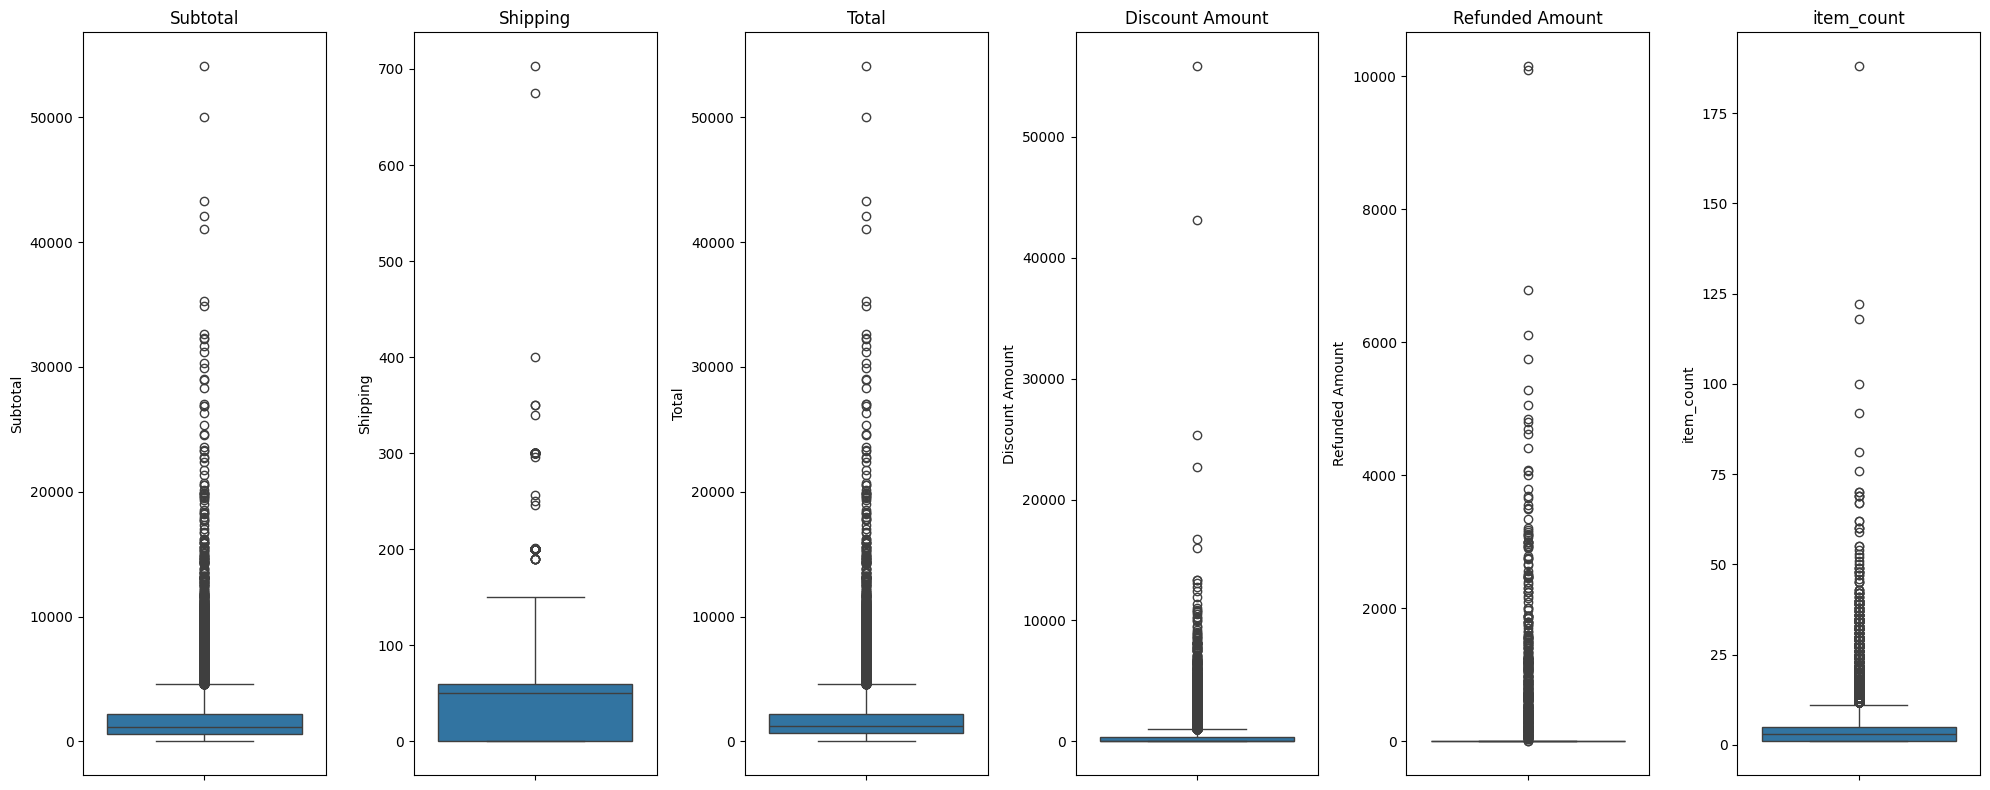

In [33]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i) 
    sns.boxplot(y=df[column])
    plt.title(column)
    
plt.tight_layout()
plt.show()

In [34]:
fig = sp.make_subplots(rows=1, cols=len(numerical_columns))

for i, column in enumerate(numerical_columns, 1):
    fig.add_trace(go.Box(y=df[column], name=column), row=1, col=i)

fig.update_layout(
    title_text="Boxplots of Numerical Columns",
    showlegend=False,
    height=500,
    width=2000
)

fig.show()

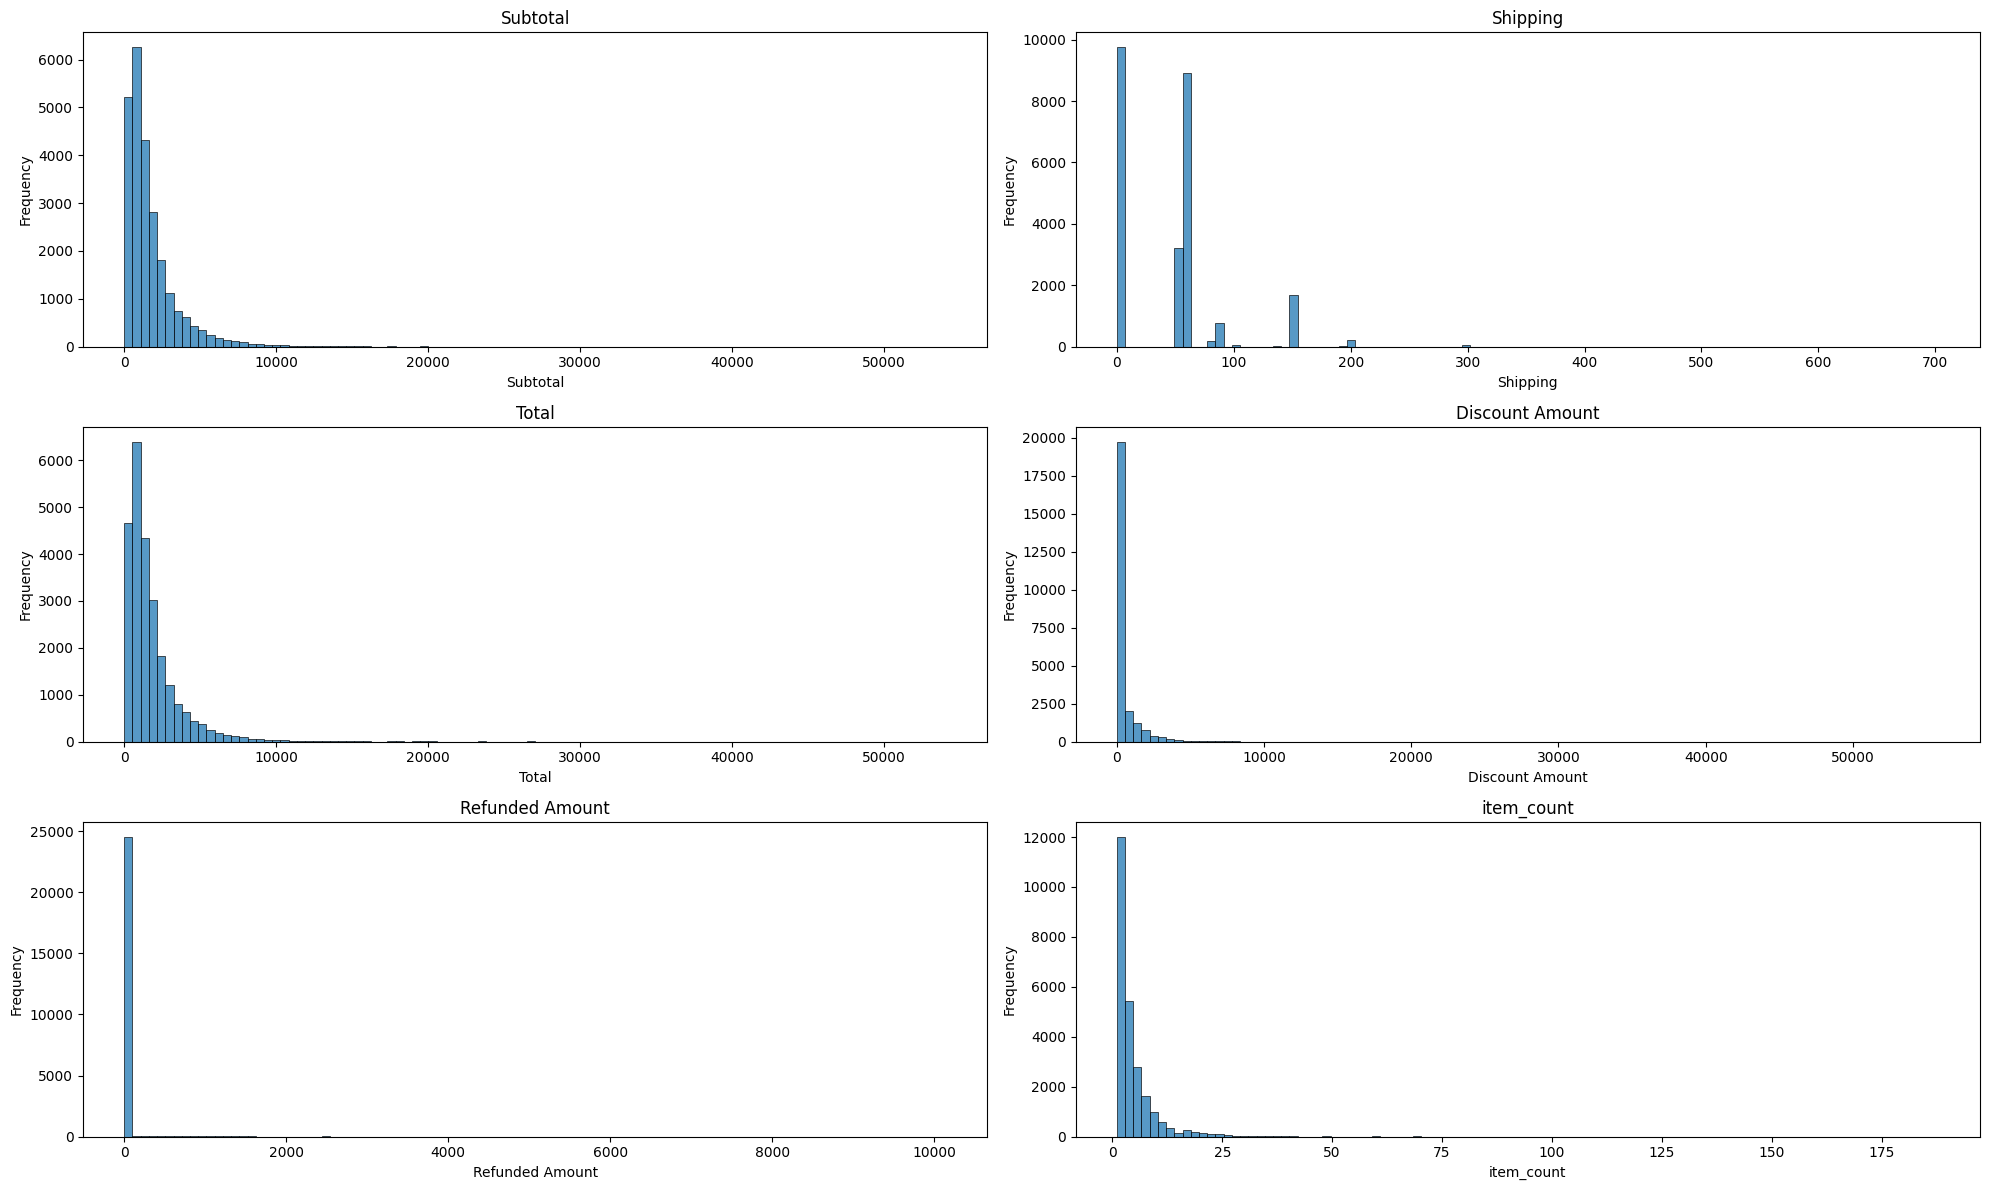

In [35]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 12))

num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2 

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 2, i)  
    sns.histplot(x=df[column], bins=100)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [36]:
colors = pc.qualitative.Dark24[:len(numerical_columns)] 

fig = go.Figure()

for i, (column, color) in enumerate(zip(numerical_columns, colors)):
    fig.add_trace(
        go.Histogram(
            x=df[column], 
            name=column, 
            nbinsx=100, 
            opacity=1,
            marker_color=color,  
            visible=True if i == 0 else False  
        )
    )

dropdown_buttons = [
    {
        "label": column,
        "method": "update",
        "args": [
            {"visible": [i == j for j in range(len(numerical_columns))]},  
            {"title": f"<b>Interactive Histogram: {column}</b>"}
        ]
    }
    for i, column in enumerate(numerical_columns)
]

fig.update_layout(
    title=f"<b>Interactive Histogram: {numerical_columns[0]}</b>",
    xaxis_title="Value",
    yaxis_title="Frequency",
    updatemenus=[{
        "buttons": dropdown_buttons,
        "direction": "down",
        "showactive": True,
        "x": 1,
        "y": 1.10
    }],
    height=600,
    width=1280,
    barmode='overlay'
)

fig.show()



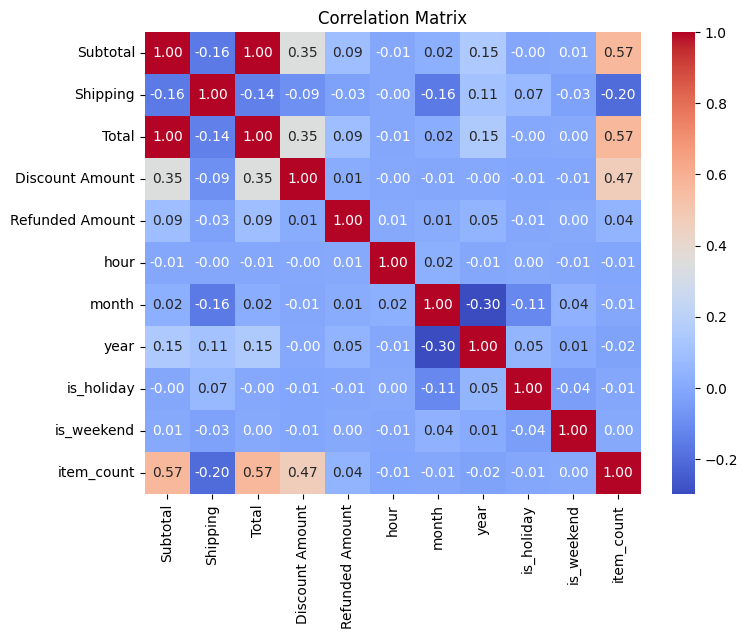

In [37]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [38]:
fig = ff.create_annotated_heatmap(
    z=corr.values, 
    x=list(corr.columns), 
    y=list(corr.index), 
    annotation_text=corr.round(2).values, 
    colorscale="tempo",
    showscale=True
)

fig.update_layout(title="Interactive Correlation Matrix", height=600, width=700)

fig.show()

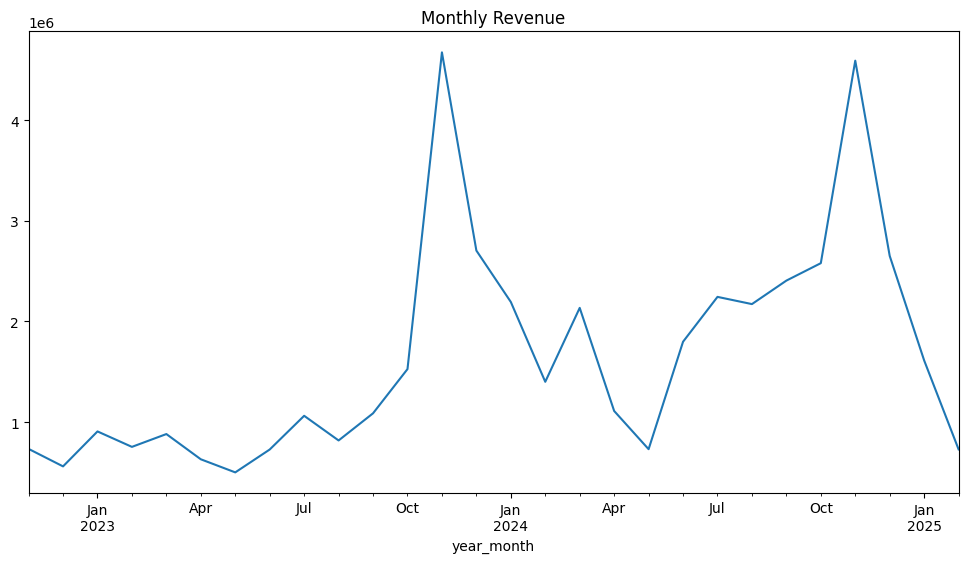

In [39]:
monthly_revenue = df.groupby('year_month')['Total'].sum()
monthly_revenue.plot(kind='line', figsize=(12, 6), title='Monthly Revenue')
plt.show()

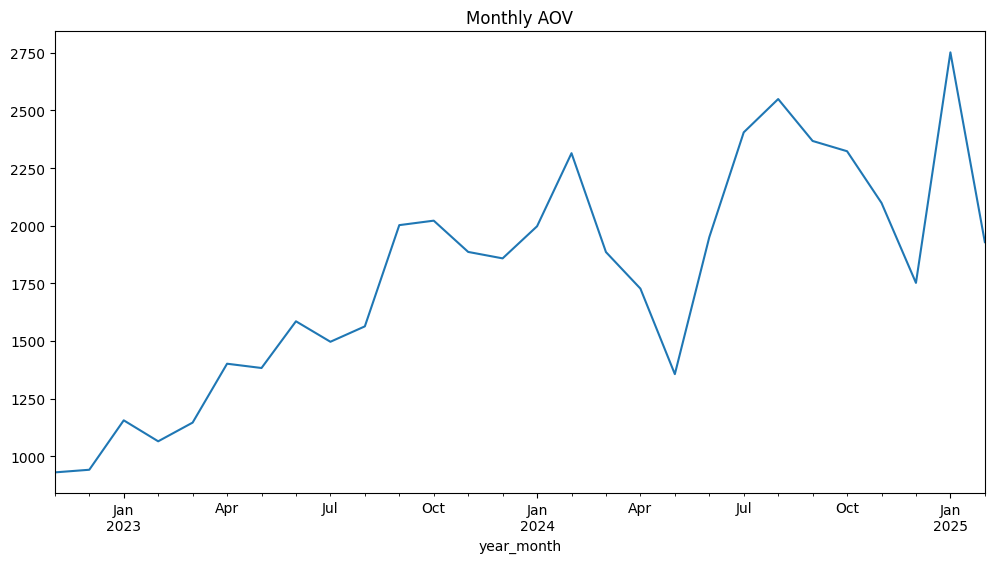

In [40]:
monthly_aov = df.groupby('year_month')['Total'].mean()
monthly_aov.plot(kind='line', figsize=(12, 6), title='Monthly AOV')
plt.show()

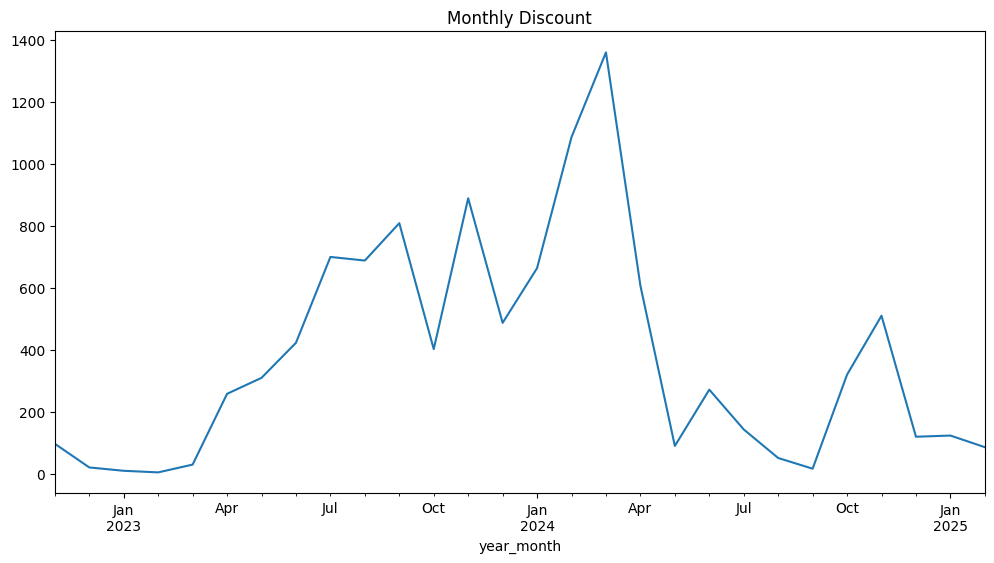

In [41]:
monthly_discount = df.groupby('year_month')['Discount Amount'].mean()
monthly_discount.plot(kind='line', figsize=(12, 6), title='Monthly Discount')
plt.show()

In [42]:
monthly_revenue.index = monthly_revenue.index.astype(str)
monthly_aov.index = monthly_aov.index.astype(str)
monthly_discount.index = monthly_discount.index.astype(str)

colors = ["blue", "green", "red"]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=monthly_revenue.index, y=monthly_revenue, 
    mode='lines+markers', name='Monthly Revenue', 
    line=dict(color=colors[0]), visible=True
))

fig.add_trace(go.Scatter(
    x=monthly_aov.index, y=monthly_aov, 
    mode='lines+markers', name='Monthly AOV', 
    line=dict(color=colors[1]), visible=False
))

fig.add_trace(go.Scatter(
    x=monthly_discount.index, y=monthly_discount, 
    mode='lines+markers', name='Monthly Discount', 
    line=dict(color=colors[2]), visible=False
))

fig.update_layout(
    title="Monthly Metrics Overview",
    xaxis_title="Year-Month",
    yaxis_title="Value",
    height=600,
    width=900,
    hovermode="x unified",
    updatemenus=[
        {
            "buttons": [
                {"label": "Monthly Revenue", "method": "update", 
                 "args": [{"visible": [True, False, False]}, {"title": "Monthly Revenue"}]},
                {"label": "Monthly AOV", "method": "update", 
                 "args": [{"visible": [False, True, False]}, {"title": "Monthly AOV"}]},
                {"label": "Monthly Discount", "method": "update", 
                 "args": [{"visible": [False, False, True]}, {"title": "Monthly Discount"}]},
            ],
            "direction": "down",
            "showactive": True
        }
    ]
)

fig.show()


Lineitem name
Plain Towels 500GSM - 30x30 / Off White    980
Pillow Protector - WHITE / 50*70           833
Plain Towels 500GSM - 30x30 / Grey         824
Plain Towels 500GSM - 30x30 / White        813
Plain Towels 500GSM - 30x30 / Coffee       664
Pillow Protector - GREY / 50*70            663
Plain Towels 500GSM - 30x30 / Mint         634
Golden Christmas Hand Towel                566
Mattress Protector - 180x200 / White       520
Olivia Kitchen Towel 30x50cm - Coffee      503
Olivia Kitchen Towel 30x50cm - Navy        499
Mattress Protector - 120x200 / White       477
Plain Towels 500GSM - 30x30 / Navy         474
Mattress Protector - 160x200 / White       470
Diamond Towel - 30x30 / Off White          460
Hollow Fiber Pillow - 1000gm               459
Waffle Towel - 30x30 / Navy                459
Waffle Towel - 30x30 / Off White           458
Mattress Protector - 180x200 / Grey        445
Waffle Towel - 30x30 / Mint                444
Name: Lineitem quantity, dtype: int64

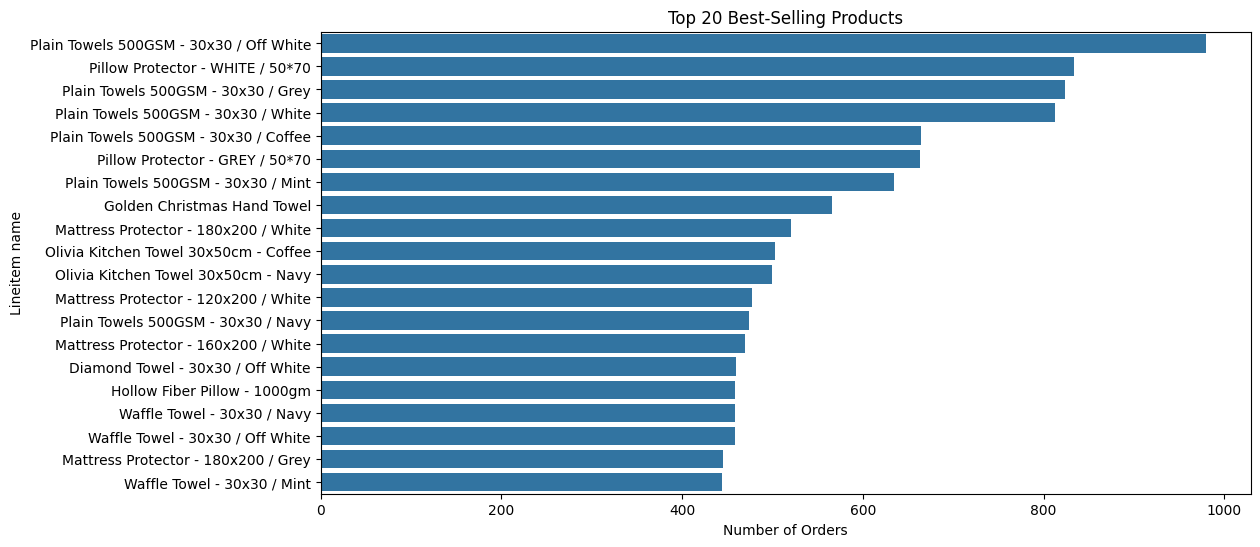

In [43]:
all_products = df['Lineitem name'].explode()
all_products = pd.concat([all_products,df['Lineitem quantity'].explode()],axis=1)
all_products['Lineitem quantity'] = pd.to_numeric(all_products['Lineitem quantity'], errors='coerce')

top_products = all_products.groupby('Lineitem name')['Lineitem quantity'].sum().sort_values(ascending=False).head(20)
    

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 20 Best-Selling Products')
plt.xlabel('Number of Orders')
top_products

In [44]:
all_products = df['Lineitem name'].explode()
all_products = pd.concat([all_products, df['Lineitem quantity'].explode()], axis=1)

all_products['Lineitem quantity'] = pd.to_numeric(all_products['Lineitem quantity'], errors='coerce')

top_products = all_products.groupby('Lineitem name')['Lineitem quantity'].sum().sort_values(ascending=False).head(20)

fig = px.bar(
    top_products, 
    x=top_products.values, 
    y=top_products.index, 
    orientation='h',
    title="Top 20 Best-Selling Products",
    labels={'x': 'Number of Orders', 'y': 'Product Name'},
    text=top_products.values,
)

fig.update_layout(
    xaxis_title="Number of Orders", 
    yaxis_title="Product Name", 
    height=600, 
    width=900,
    yaxis={'categoryorder':'total ascending'}
)

fig.update_traces(marker_color='royalblue', textposition='outside')

fig.show()

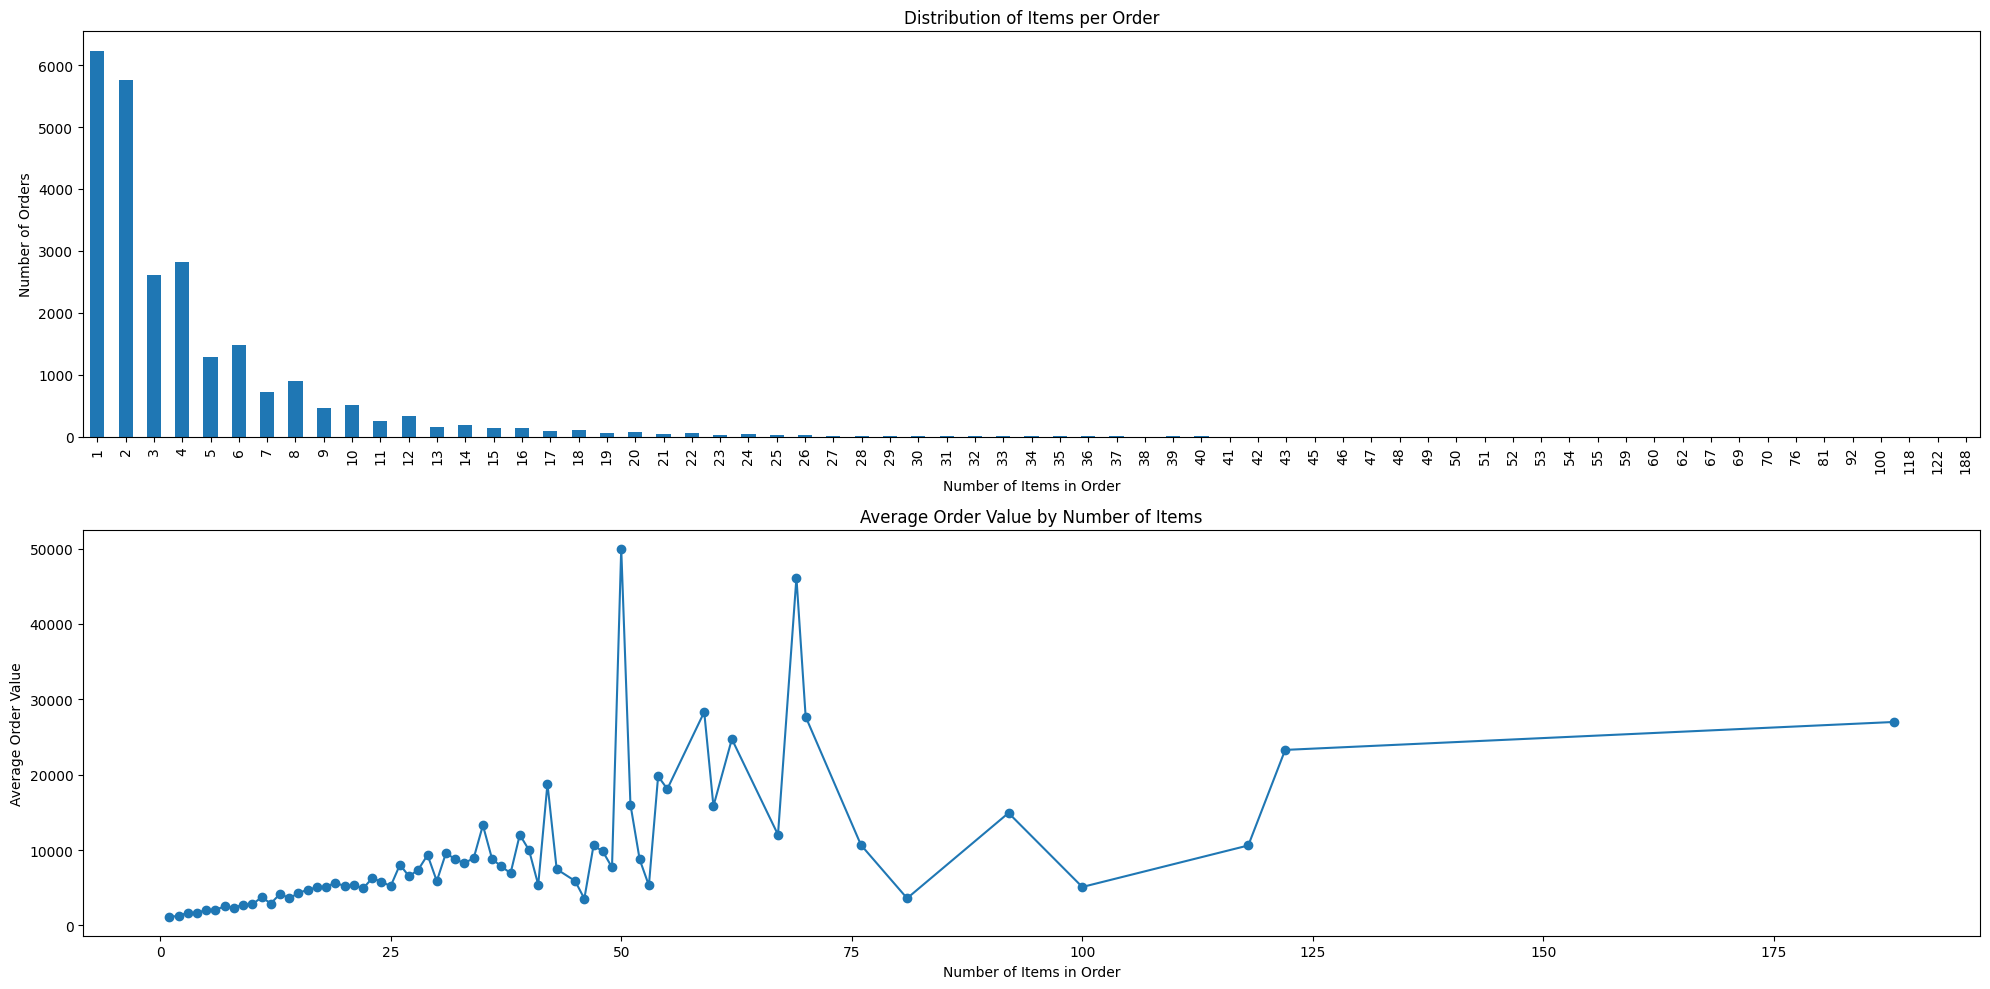

In [45]:
plt.figure(figsize=(20, 10))
# Distribution of order sizes
plt.subplot(2, 1, 1)
df['item_count'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items in Order')
plt.ylabel('Number of Orders')

# Average order value by number of items
plt.subplot(2, 1, 2)
avg_order_value = df.groupby('item_count')['Total'].mean()
avg_order_value.plot(kind='line', marker='o')
plt.title('Average Order Value by Number of Items')
plt.xlabel('Number of Items in Order')
plt.ylabel('Average Order Value')

plt.tight_layout()
plt.show()




In [46]:
order_size_counts = df['item_count'].value_counts().sort_index()

avg_order_value = df.groupby('item_count')['Total'].mean()

fig = sp.make_subplots(
    rows=2, cols=1, 
    subplot_titles=["Distribution of Items per Order", "Average Order Value by Number of Items"]
)

fig.add_trace(
    go.Bar(x=order_size_counts.index, y=order_size_counts.values, name="Order Size Distribution"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=avg_order_value.index, y=avg_order_value.values, mode='lines+markers', name="Average Order Value"),
    row=2, col=1
)

fig.update_layout(
    height=800, width=1280, 
    title_text="Order Size and Value Analysis",
    xaxis_title="Number of Items in Order",
    yaxis_title="Number of Orders",
    showlegend=False
)

fig.show()


In [47]:
day_analysis = df.groupby('day_type').agg({
    'Total': ['count', 'mean', 'sum'],
    'item_count': ['sum'] 
}).round(2)

day_analysis.columns = ['count', 'mean', 'sum', 'items_count']

day_analysis = day_analysis.reindex(['Holiday', 'Weekday', 'Weekend'])


In [48]:

yearly_orders = df.groupby('year').agg({
    'Name': 'count',
    'Total': 'sum'
}).rename(columns={'Name': 'order_count'})

seasonal_analysis = df.groupby('season',observed=False).agg({
    'Name': 'count',
    'Total': ['mean', 'sum'],
})
seasonal_orders = df.groupby(['year', 'season'],observed=False)['Total'].sum().unstack()


monthly_trend = df.groupby('year_month').agg({
    'Name': 'count',
    'Total': 'sum'
})

province_yearly = df.groupby(['year', 'Shipping Province Name']).agg({
    'Name': 'count',
    'Total': 'sum'
})

pivot_province = province_yearly.reset_index().pivot(
    index='Shipping Province Name', 
    columns='year', 
    values='Total'
)



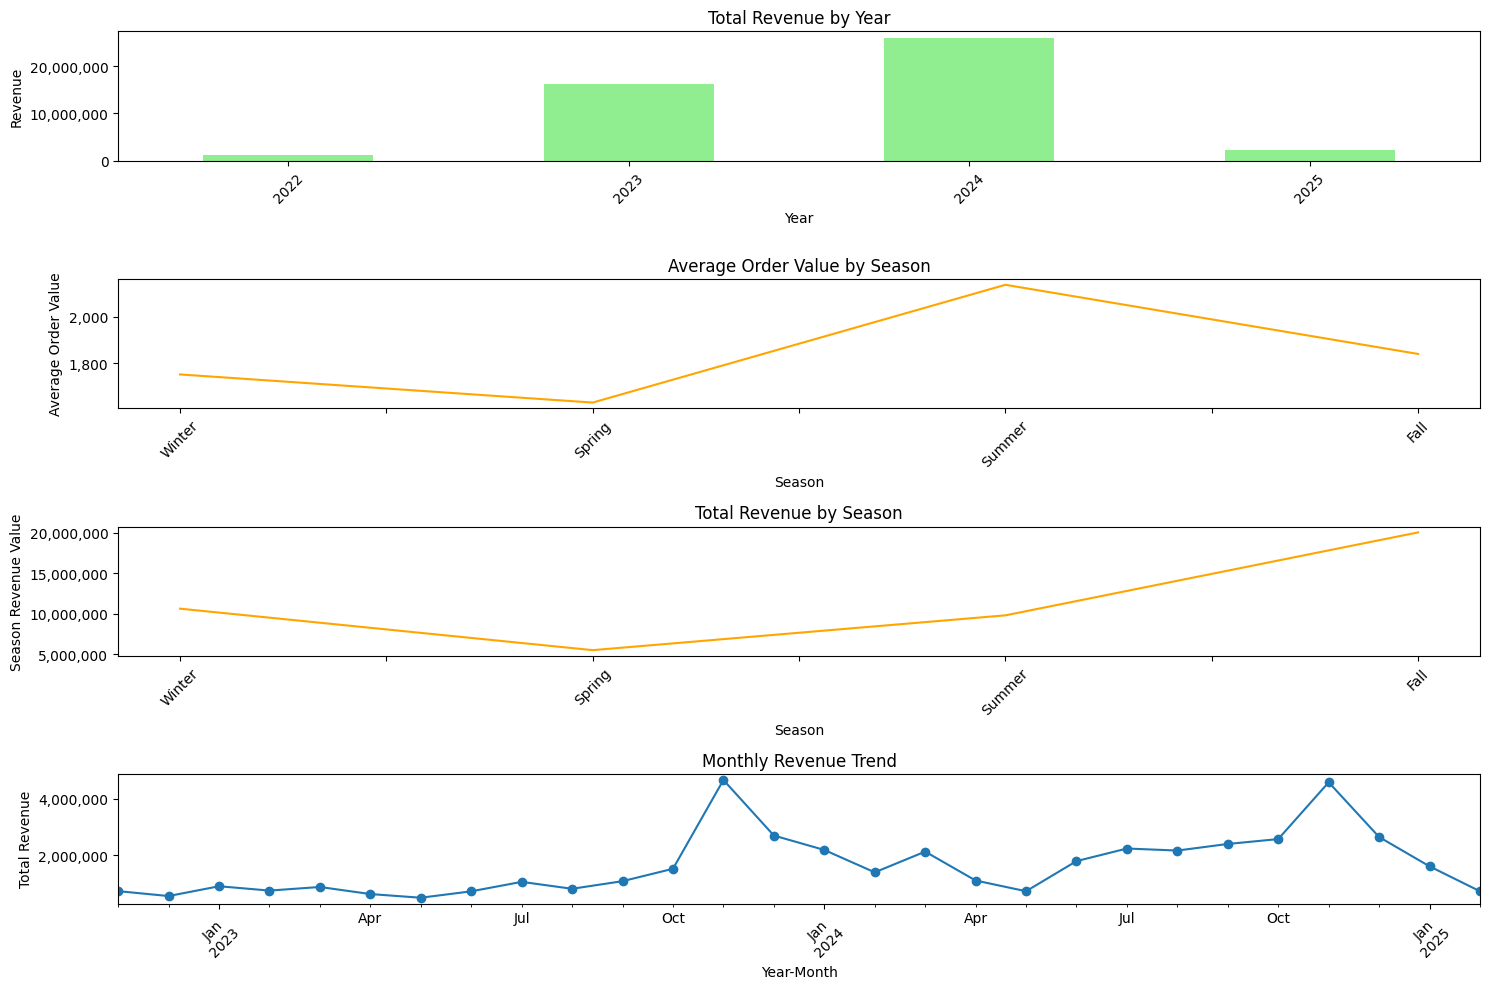

In [49]:
plt.figure(figsize=(15, 10))

# Yearly revenue subplot
plt.subplot(4, 1, 1)
ax1 = yearly_orders['Total'].plot(kind='bar', y='Total', color='lightgreen')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)

#  Seasonal Analysis
plt.subplot(4, 1, 2)
ax2 = seasonal_analysis['Total']['mean'].plot(kind='line',y='mean', color='orange')
plt.title('Average Order Value by Season')
plt.xlabel('Season')
plt.ylabel('Average Order Value')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)

#  Seasonal Analysis
plt.subplot(4, 1, 3)
ax3 = seasonal_analysis['Total']['sum'].plot(kind='line',y='sum', color='orange')
plt.title('Total Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Season Revenue Value')
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)

#  Monthly Trend
plt.subplot(4,1, 4)
ax4 = monthly_trend['Total'].plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



In [50]:
yearly_orders.index = yearly_orders.index.astype(str)
seasonal_analysis.index = seasonal_analysis.index.astype(str)
monthly_trend.index = monthly_trend.index.astype(str)

fig = sp.make_subplots(
    rows=4, cols=1, 
    subplot_titles=[
        "Total Revenue by Year",
        "Average Order Value by Season",
        "Total Revenue by Season",
        "Monthly Revenue Trend"
    ],
    vertical_spacing=0.15
)

fig.add_trace(
    go.Bar(x=yearly_orders.index, y=yearly_orders['Total'], marker_color="lightgreen", name="Total Revenue"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=seasonal_analysis.index, y=seasonal_analysis['Total']['mean'], 
               mode='lines+markers', line=dict(color="orange"), name="Avg Order Value"),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=seasonal_analysis.index, y=seasonal_analysis['Total']['sum'], 
               mode='lines+markers', line=dict(color="red"), name="Total Revenue"),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(x=monthly_trend.index, y=monthly_trend['Total'], 
               mode='lines+markers', line=dict(color="blue"), name="Monthly Revenue"),
    row=4, col=1
)

fig.update_layout(
    height=1000, width=1280, 
    title="Revenue & Seasonal Analysis",
    showlegend=False,  
    xaxis4=dict(title="Year-Month"),
    xaxis3=dict(title="Season"),
    xaxis2=dict(title="Season"),
    xaxis1=dict(title="Year"),
    yaxis1=dict(title="Revenue"),
    yaxis2=dict(title="Average Order Value"),
    yaxis3=dict(title="Total Revenue"),
    yaxis4=dict(title="Total Revenue"),
)

fig.show()

<Figure size 1500x1000 with 0 Axes>

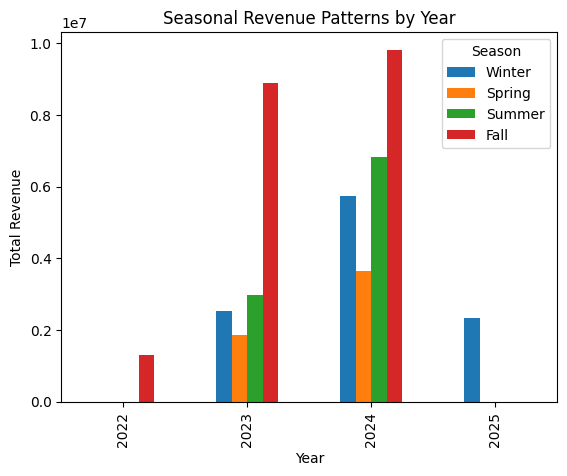

In [51]:
plt.figure(figsize=(15,10))


seasonal_orders.plot(kind='bar')
plt.title('Seasonal Revenue Patterns by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Season')

plt.show()

In [52]:
seasonal_orders.index = seasonal_orders.index.astype(str)

fig = px.bar(
    seasonal_orders, 
    x=seasonal_orders.index, 
    y=seasonal_orders.columns,  
    title="Seasonal Revenue Patterns by Year",
    labels={"value": "Total Revenue", "variable": "Season", "x": "Year"},
    barmode="group"
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Total Revenue",
    legend_title="Season",
    height=600,
    width=900
)

fig.show()

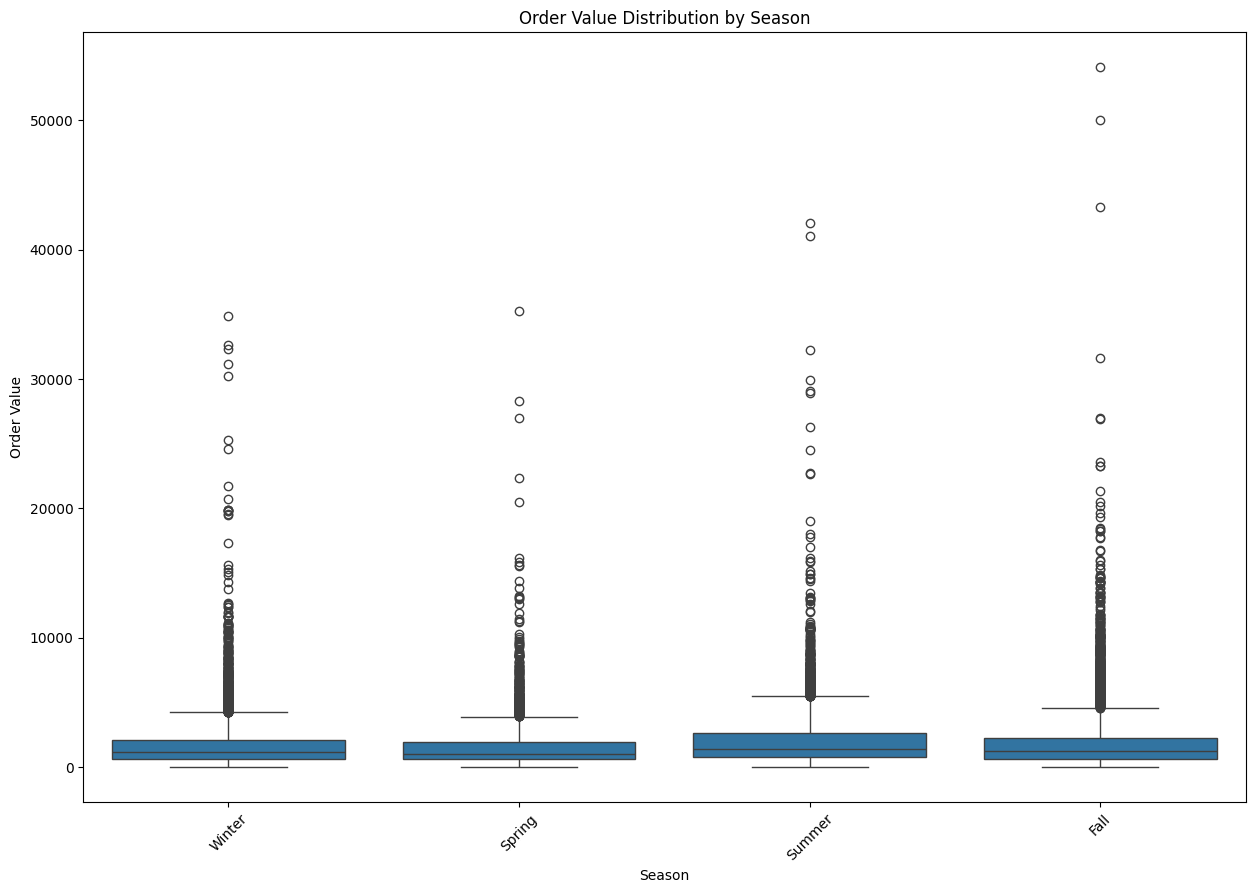

In [53]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='season', y='Total')
plt.title('Order Value Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Order Value')
plt.xticks(rotation=45)

plt.show()

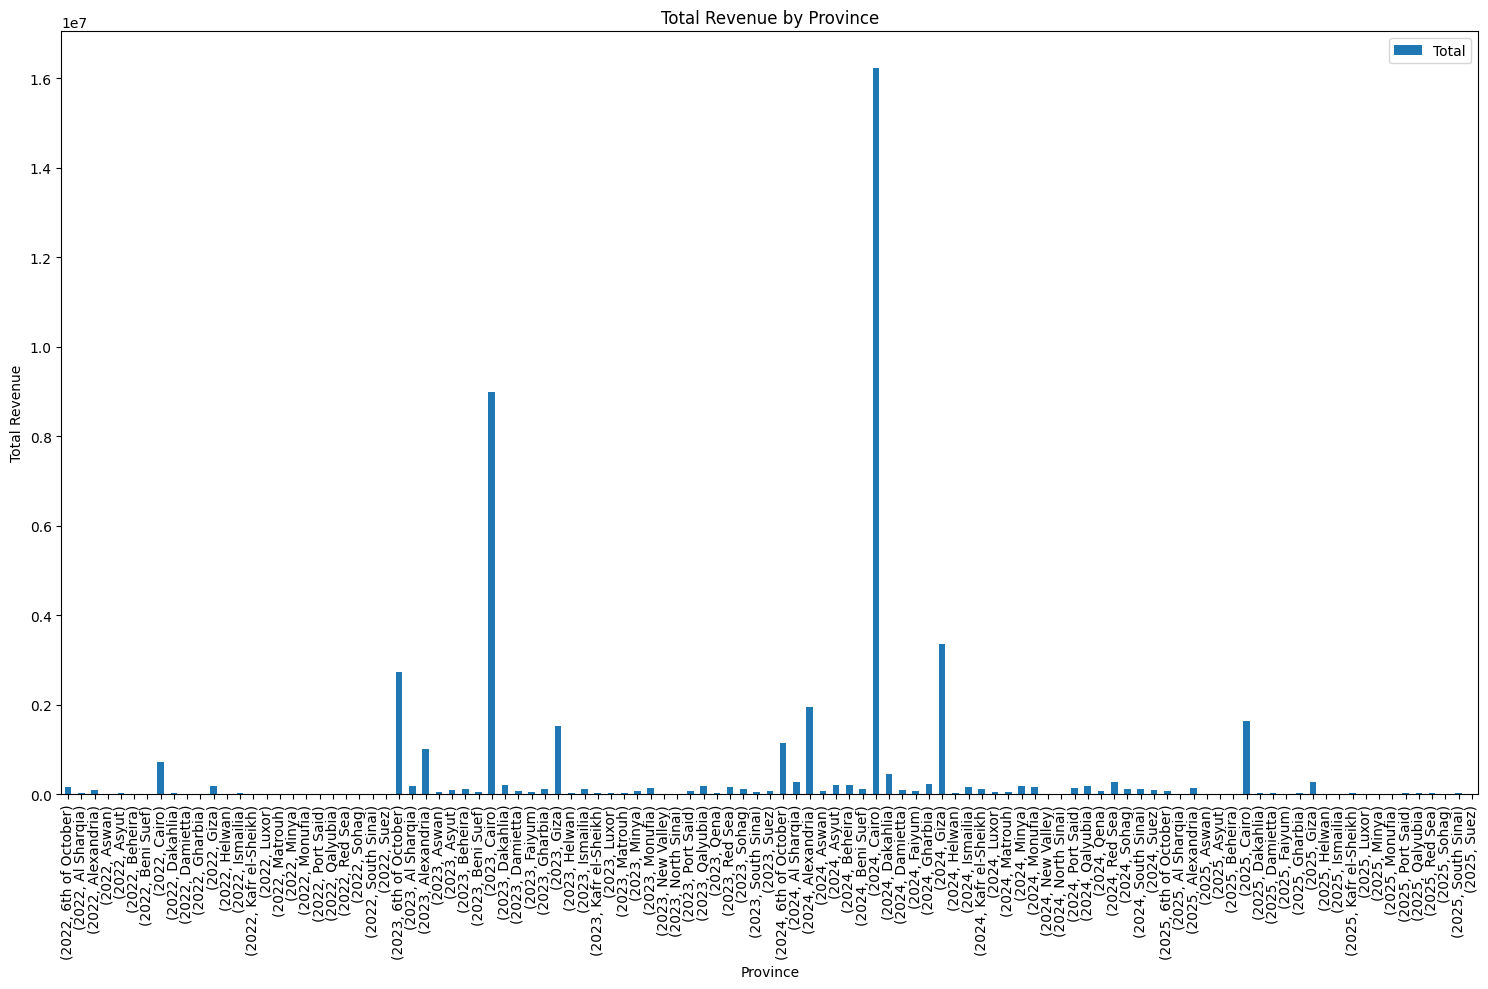

In [54]:
province_yearly.plot(kind='bar', y='Total', figsize=(15, 10))
plt.title('Total Revenue by Province')
plt.xlabel('Province')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

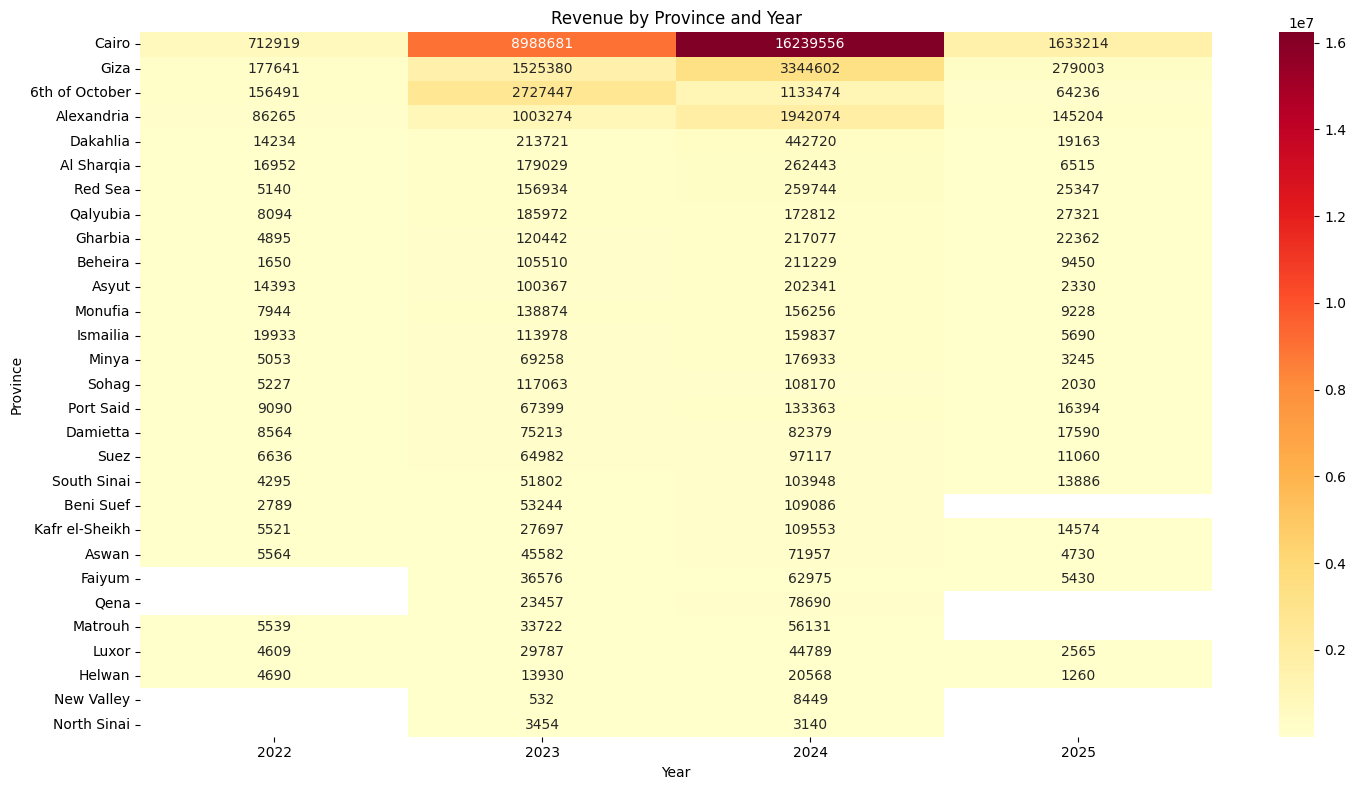

In [55]:

plt.figure(figsize=(15, 8))
province_totals = pivot_province.sum(axis=1).sort_values(ascending=False)
pivot_province_sorted = pivot_province.reindex(province_totals.index)
sns.heatmap(pivot_province_sorted, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Revenue by Province and Year')
plt.xlabel('Year')
plt.ylabel('Province')
plt.tight_layout()
plt.show()


In [56]:
yoy_growth = ((yearly_orders - yearly_orders.shift(1)) / yearly_orders.shift(1)) * 100

mom_growth = ((monthly_trend - monthly_trend.shift(1)) / monthly_trend.shift(1)) * 100



product_prices = []
for idx, row in df.iterrows():
    year = row['Created at'].year
    for price, product in zip(row['Lineitem price'], row['Lineitem name']):
        product_prices.append({
            'year': year,
            'product': product,
            'price': price
        })

product_df = pd.DataFrame(product_prices)

yearly_prices = product_df.groupby(['year', 'product'])['price'].mean().reset_index()

price_pivot = yearly_prices.pivot(index='product', columns='year', values='price')

yoy_changes = pd.DataFrame()
for year in range(price_pivot.columns.min()+1, price_pivot.columns.max()+1):
    
    yoy = ((price_pivot[year] - price_pivot[year-1]) / price_pivot[year-1] * 100)

    yoy = yoy.replace([np.inf, -np.inf], np.nan)
    yoy_changes[f'{year}_YoY%'] = yoy

    

final_analysis = pd.concat([price_pivot, yoy_changes], axis=1)

final_analysis = final_analysis.sort_index()





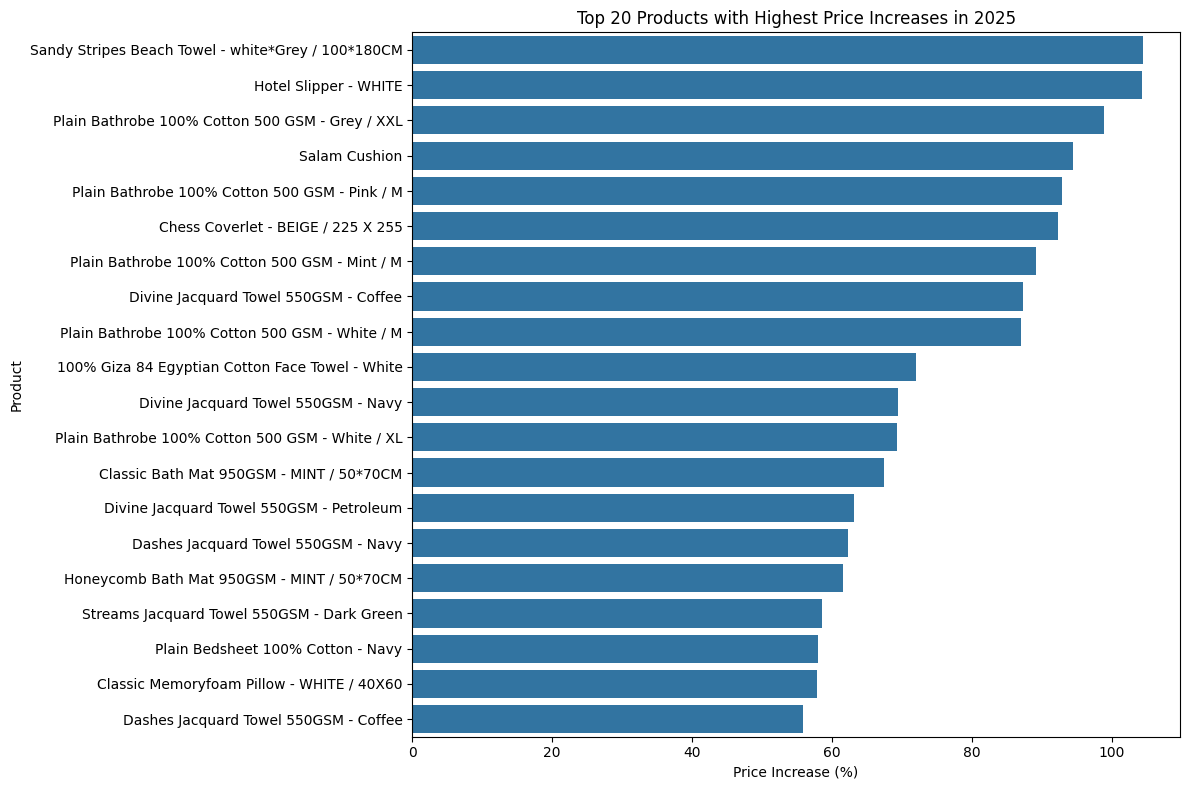

In [57]:
plt.figure(figsize=(12,8))

latest_year = f'{price_pivot.columns.max()}_YoY%'
top_20_increases = yoy_changes[latest_year].sort_values(ascending=False).head(20)

sns.barplot(x=top_20_increases.values, y=top_20_increases.index)
plt.title(f'Top 20 Products with Highest Price Increases in {price_pivot.columns.max()}')
plt.xlabel('Price Increase (%)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

In [58]:
latest_year = f'{price_pivot.columns.max()}_YoY%'

top_20_increases = yoy_changes[latest_year].sort_values(ascending=False).head(20)

fig = px.bar(
    x=top_20_increases.values,
    y=top_20_increases.index,  
    orientation="h",  
    title=f"Top 20 Products with Highest Price Increases in {price_pivot.columns.max()}",
    labels={"x": "Price Increase (%)", "y": "Product"},
    color=top_20_increases.values, 
    color_continuous_scale="Reds"
)

fig.update_layout(
    xaxis_title="Price Increase (%)",
    yaxis_title="Product",
    height=600,
    width=900,
    yaxis=dict(categoryorder="total ascending")
)

fig.show()


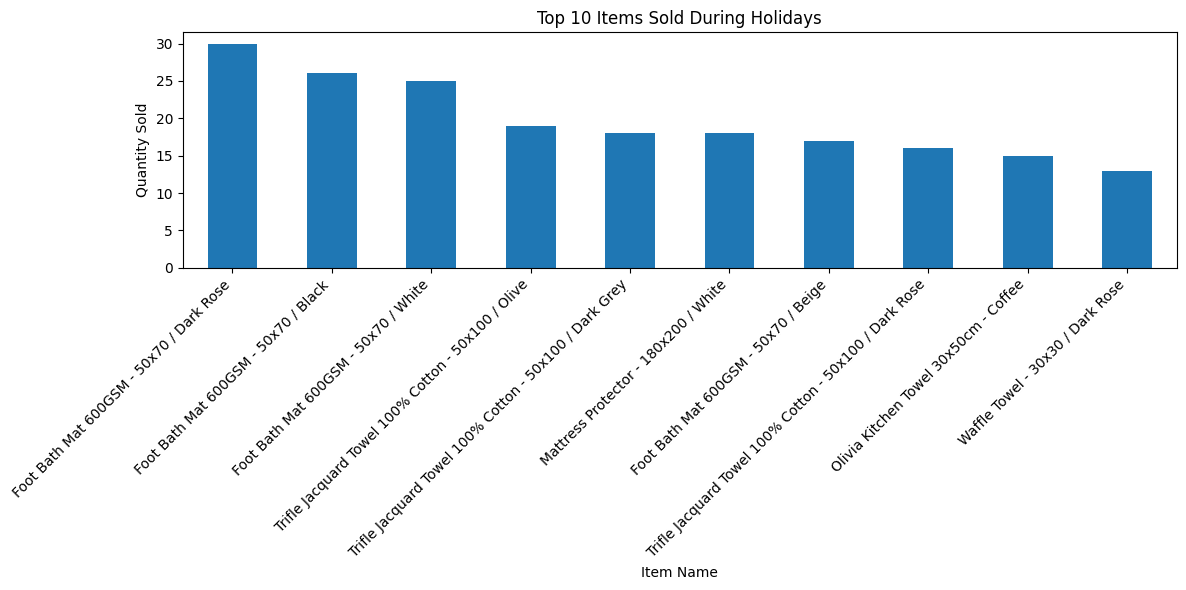

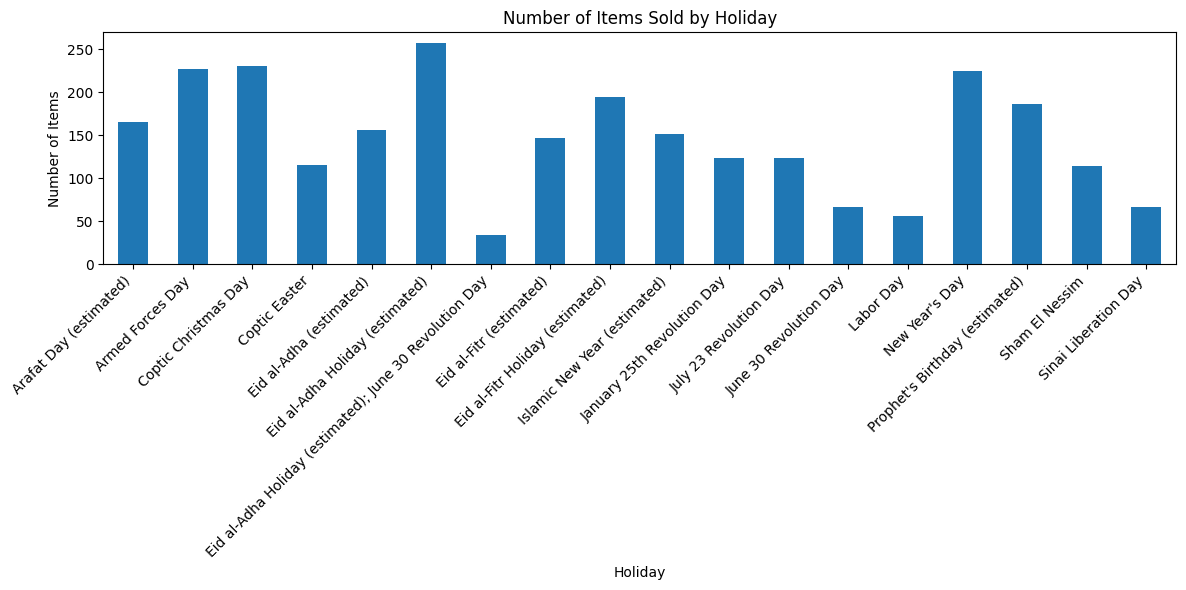

In [59]:
if df['is_holiday'].any():
    holiday_items = []
    
    # Process each holiday order
    holiday_orders = df[df['is_holiday']]
    for _, row in holiday_orders.iterrows():
        items = row['Lineitem name']
        prices = row['Lineitem price']
        holiday = row['holiday_name']

        for item, price in zip(items, prices):
            holiday_items.append({
                'holiday': holiday,
                'item': item.strip(),
                'price': float(price),
                'date': row['Created at']
            })
    
    holiday_items_df = pd.DataFrame(holiday_items)
    

    holiday_analysis = holiday_items_df.groupby(['holiday', 'item']).agg({
        'item': 'count',
        'price': ['mean', 'sum']
    }).round(2)
    
    holiday_analysis.columns = ['quantity_sold', 'avg_price', 'total_revenue']
    

    
    # Top items sold during holidays
    top_holiday_items = holiday_items_df.groupby('item')['item'].count().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    top_holiday_items.plot(kind='bar')
    plt.title('Top 10 Items Sold During Holidays')
    plt.xlabel('Item Name')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Sales distribution by holiday
    plt.figure(figsize=(12, 6))
    holiday_items_df.groupby('holiday')['item'].count().plot(kind='bar')
    plt.title('Number of Items Sold by Holiday')
    plt.xlabel('Holiday')
    plt.ylabel('Number of Items')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [60]:
if df['is_holiday'].any():
    holiday_items = []

    holiday_orders = df[df['is_holiday']]
    for _, row in holiday_orders.iterrows():
        items = row['Lineitem name']
        prices = row['Lineitem price']
        holiday = row['holiday_name']

        for item, price in zip(items, prices):
            holiday_items.append({
                'holiday': holiday,
                'item': item.strip(),
                'price': float(price),
                'date': row['Created at']
            })

    holiday_items_df = pd.DataFrame(holiday_items)

    holiday_analysis = holiday_items_df.groupby(['holiday', 'item']).agg({
        'item': 'count',
        'price': ['mean', 'sum']
    }).round(2)
    
    holiday_analysis.columns = ['quantity_sold', 'avg_price', 'total_revenue']

    top_holiday_items = holiday_items_df.groupby('item')['item'].count().sort_values(ascending=False).head(10)
    fig1 = px.bar(
        x=top_holiday_items.index,
        y=top_holiday_items.values,
        title="Top 10 Items Sold During Holidays",
        labels={"x": "Item Name", "y": "Quantity Sold"},
        color=top_holiday_items.values,
        color_continuous_scale="Blues"
    )
    fig1.update_layout(xaxis_tickangle=-45, height=500, width=1280)
    fig1.show()

    holiday_sales = holiday_items_df.groupby('holiday')['item'].count()
    fig2 = px.bar(
        x=holiday_sales.index,
        y=holiday_sales.values,
        title="Number of Items Sold by Holiday",
        labels={"x": "Holiday", "y": "Number of Items"},
        color=holiday_sales.values,
        color_continuous_scale="Oranges"
    )
    fig2.update_layout(xaxis_tickangle=-45, height=500, width=1280)
    fig2.show()

Text(0, 0.5, 'Frequency')

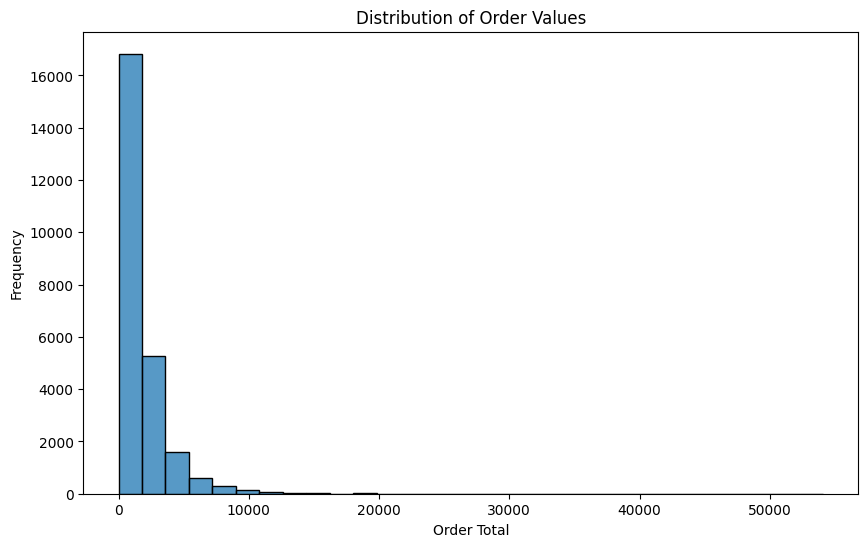

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(df['Subtotal'], bins=30)
plt.title('Distribution of Order Values')
plt.xlabel('Order Total')
plt.ylabel('Frequency')

In [62]:
fig = px.histogram(
    df, 
    x="Subtotal", 
    nbins=30, 
    title="Distribution of Order Values", 
    labels={"Subtotal": "Order Total", "count": "Frequency"}, 
    color_discrete_sequence=["royalblue"]
)

fig.update_layout(
    bargap=0.1,
    height=500, width=800
)

fig.show()

## Statistics


In [63]:
# Summary statistics
print("\nOrder Size Summary:")
print(f"Most common order size: {df['item_count'].mode().values[0]} items")
print(f"Average order size: {df['item_count'].mean():.2f} items")
print(f"Maximum items in an order: {df['item_count'].max()}")
print(f"Minimum items in an order: {df['item_count'].min()}")



Order Size Summary:
Most common order size: 1 items
Average order size: 4.46 items
Maximum items in an order: 188
Minimum items in an order: 1


In [64]:
print("\nSales Analysis by Day Type:")
print(day_analysis)


print("\nItem Analysis:")
print(f"Average items per order: {df['item_count'].mean():.2f}")
print(f"Maximum items in an order: {df['item_count'].max()}")
print(f"Minimum items in an order: {df['item_count'].min()}")


Sales Analysis by Day Type:
          count     mean          sum  items_count
day_type                                          
Holiday     843  1804.65   1521319.14         3610
Weekday   16767  1837.97  30817317.49        74802
Weekend    7284  1864.64  13582034.57        32669

Item Analysis:
Average items per order: 4.46
Maximum items in an order: 188
Minimum items in an order: 1


In [65]:
yoy_changes['Avg_Change'] = yoy_changes.abs().mean(axis=1)
print("\nOverall Price Change Statistics:")
for year in yoy_changes.columns:
    if year != 'Avg_Change':
        print(f"\nYear {year}:")
        print(f"Average Change: {yoy_changes[year].mean():.2f}%")
        print(f"Median Change: {yoy_changes[year].median():.2f}%")
        print(f"Max Increase: {yoy_changes[year].max():.2f}%")
        print(f"Max Decrease: {yoy_changes[year].min():.2f}%")




Overall Price Change Statistics:

Year 2023_YoY%:
Average Change: 47.49%
Median Change: 28.38%
Max Increase: 351.11%
Max Decrease: -53.89%

Year 2024_YoY%:
Average Change: 28.42%
Median Change: 17.65%
Max Increase: 224.66%
Max Decrease: -46.37%

Year 2025_YoY%:
Average Change: -1.24%
Median Change: 0.00%
Max Increase: 104.55%
Max Decrease: -74.29%


In [66]:




# Explode the Lineitem name and Lineitem price columns
df_orders = df.explode('Lineitem name').explode('Lineitem price').reset_index(drop=True)
df_orders.rename(columns={'Lineitem name': 'product', 'Lineitem price': 'price'}, inplace=True)

df_yoy = pd.DataFrame(yoy_changes)

# Reshape the YoY DataFrame to long format


# Merge the DataFrames on 'product' and 'year'
df_merged = pd.merge(df_orders, yoy_changes, on=['product'], how='left')

# # Calculate the YoY price change
# df_merged['price_change'] = df_merged['price'] * df_merged['yoy_change']

# Display the result
print(df_merged)

            Name                Created at  Subtotal  Shipping   Total  \
0       #MC14035 2022-11-01 00:32:29+02:00    1150.0       0.0  1150.0   
1       #MC14035 2022-11-01 00:32:29+02:00    1150.0       0.0  1150.0   
2       #MC14035 2022-11-01 00:32:29+02:00    1150.0       0.0  1150.0   
3       #MC14035 2022-11-01 00:32:29+02:00    1150.0       0.0  1150.0   
4       #MC14035 2022-11-01 00:32:29+02:00    1150.0       0.0  1150.0   
...          ...                       ...       ...       ...     ...   
509092  #MC40782 2025-02-15 12:43:54+02:00    2500.0      60.0  2560.0   
509093  #MC40783 2025-02-15 12:50:38+02:00     300.0      60.0   360.0   
509094  #MC40784 2025-02-15 14:59:51+02:00     300.0      60.0   360.0   
509095  #MC40785 2025-02-15 16:10:53+02:00    1200.0      60.0  1260.0   
509096  #MC40786 2025-02-15 16:37:48+02:00     300.0      60.0   360.0   

        Discount Amount Shipping Method Shipping Province  \
0                  95.0   Free Shipping           

In [67]:
print("\nSummary Statistics of Year-over-Year Price Changes:")
yoy_changes.describe()


Summary Statistics of Year-over-Year Price Changes:


2023_YoY%   2024_YoY%   2025_YoY%   Avg_Change
count  454.000000  607.000000  333.000000  1249.000000
mean    47.490116   28.418311   -1.242612    38.105332
std     64.932949   43.237484   36.405764    37.280631
min    -53.887181  -46.372240  -74.285714     0.000000
25%      0.000000   -1.110191  -32.145305    11.461582
50%     28.375365   17.647059    0.000000    27.365963
75%     83.048981   52.810248   25.585023    50.651314
max    351.111111  224.658003  104.545455   265.151786

In [68]:
import pandas as pd
import plotly.express as px
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html, Input, Output



# Initialize Dash app with a light Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.FLATLY])

# Layout
app.layout = dbc.Container([
    html.H1("Sales Dashboard", className="text-center mb-4"),

    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
                id='time_filter',
                options=[
                    {'label': 'Daily', 'value': 'day_of_year'},
                    {'label': 'Weekly', 'value': 'week_of_year'},
                    {'label': 'Quarterly', 'value': 'quarter'}
                ],
                value='week_of_year',
                clearable=False,
                className="mb-3"
            ),
            dcc.Graph(id='sales_trend')
        ], width=6),

        dbc.Col([
            dcc.Graph(id='discount_effect')
        ], width=6)
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='customer_trend'), width=6),
        dbc.Col(dcc.Graph(id='holiday_impact'), width=6)
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='order_analysis'), width=12)
    ])
])

# Callbacks
@app.callback(
    Output('sales_trend', 'figure'),
    Input('time_filter', 'value')
)
def update_sales_trend(time_filter):
    fig = px.line(daily_sales, x=time_filter, y='Total', title='Sales Trend', markers=True, template='plotly_white')
    return fig

@app.callback(
    Output('discount_effect', 'figure'),
    Input('time_filter', 'value')
)
def update_discount_effect(time_filter):
    fig = px.scatter(daily_sales, x='discount_ratio', y='Total', title='Discount vs Sales', trendline='ols', color='discount_ratio', template='plotly_white')
    return fig

@app.callback(
    Output('customer_trend', 'figure'),
    Input('time_filter', 'value')
)
def update_customer_trend(time_filter):
    fig = px.bar(daily_sales, x=time_filter, y='unique_customers', title='Unique Customers Trend', color='unique_customers', template='plotly_white')
    return fig

@app.callback(
    Output('holiday_impact', 'figure'),
    Input('time_filter', 'value')
)
def update_holiday_impact(time_filter):
    fig = px.bar(daily_sales, x='next_shopping_holiday', y='Total', title='Sales Before Holidays', color='pre_holiday_period', template='plotly_white')
    return fig

@app.callback(
    Output('order_analysis', 'figure'),
    Input('time_filter', 'value')
)
def update_order_analysis(time_filter):
    fig = px.bar(daily_sales, x=time_filter, y='avg_items_per_order', title='Average Items per Order Over Time', color='avg_items_per_order', template='plotly_white')
    return fig

# Run app
if __name__ == '__main__':
    app.run(debug=True, port=8051)

# Modeling

## Liner Reg

In [69]:
temp_sales = daily_sales.copy()
print(temp_sales.isnull().sum())
temp_sales.dropna(inplace=True)
start_date = '2023-01-01'
end_date = '2024-12-31'
temp_sales = temp_sales[(temp_sales['Created at'] >= start_date) & (temp_sales['Created at'] <= end_date)]
temp_sales.set_index('Created at', inplace=True)

Created at                        0
Total                             0
Subtotal                          0
item_count                        0
total_7d_avg                      6
total_30d_avg                    29
items_7d_avg                      6
total_7d_std                      6
total_prev_day                    1
total_prev_week                   7
total_prev_month                 30
total_same_day_last_week          7
items_same_day_last_week          7
total_growth_1d                   1
total_growth_1w                   7
quarter                           0
day_of_year                       0
week_of_year                      0
week_sin                          0
week_cos                          0
year_sin                          0
year_cos                          0
total_discount                    0
discount_ratio                    0
avg_shipping_cost                 0
unique_customers                  0
avg_items_per_order               0
days_to_next_shopping_holida

In [70]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [71]:
X = temp_sales.drop(columns=['Total', 'pre_holiday_period','next_shopping_holiday', 'days_to_next_shopping_holiday'], axis=1)
y = temp_sales['Total']


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report


In [74]:
print("R-squared train:", r2_score(y_train, y_train_pred))
print("mean_squared_error train:", mean_squared_error(y_train, y_train_pred))

print("R-squared test:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R-squared train: 0.9998743913484567
mean_squared_error train: 260562.16647448696
R-squared test: 0.9998894752127021
Mean Squared Error: 376979.0734475161


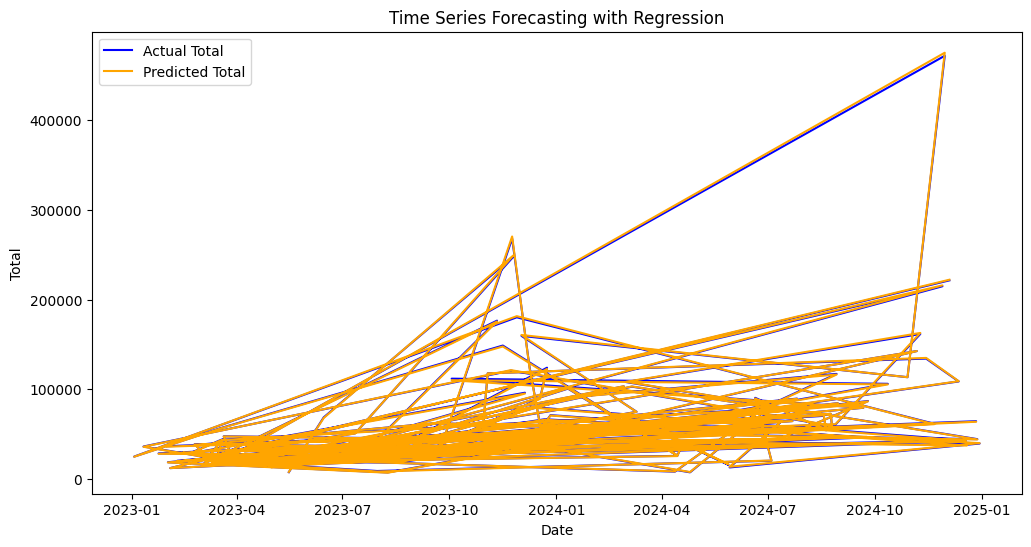

In [75]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Total', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Total', color='orange')
plt.title('Time Series Forecasting with Regression')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()

R-squared train RF: -1.322613240018383
mean_squared_error train RF: 4818021133.622383
R-squared test RF: -0.9869638189856984
Mean Squared Error RF: 90686389.07149164


/Users/ziadghanem/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

/Users/ziadghanem/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



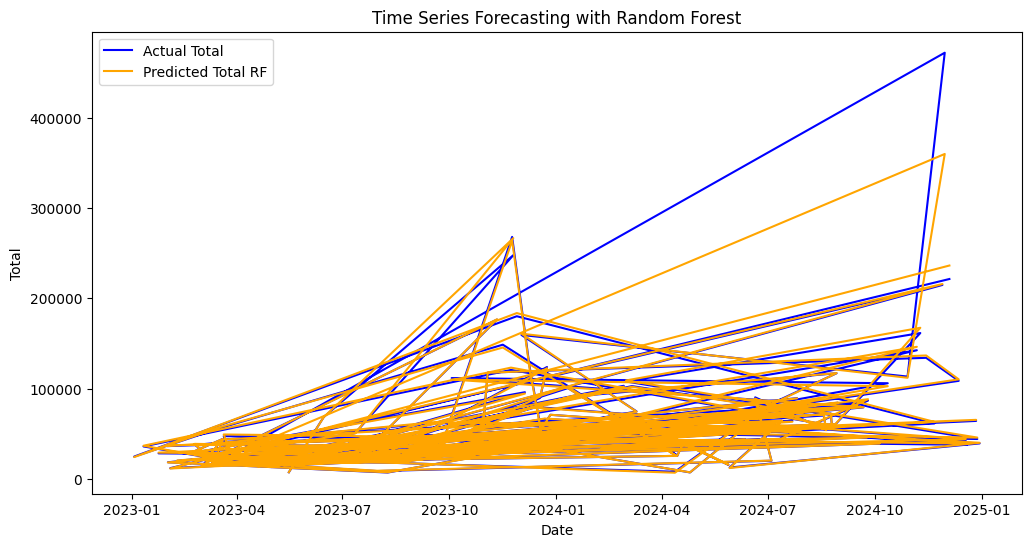

In [76]:
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_train_pred_rf = model_rf.predict(X_train_scaled)
y_test_pred_rf = model_rf.predict(X_test_scaled)
print("R-squared train RF:", r2_score(y_train, y_train_pred_rf))
print("mean_squared_error train RF:", mean_squared_error(y_train, y_train_pred_rf))
print("R-squared test RF:", r2_score(y_test, y_test_pred_rf))
print("Mean Squared Error RF:", mean_squared_error(y_test, y_pred_rf))
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Total', color='blue')
plt.plot(y_test.index, y_pred_rf, label='Predicted Total RF', color='orange')
plt.title('Time Series Forecasting with Random Forest')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.show()


XGBoost R-squared: 0.95592927272421
XGBoost Mean Squared Error: 150316886.74334505


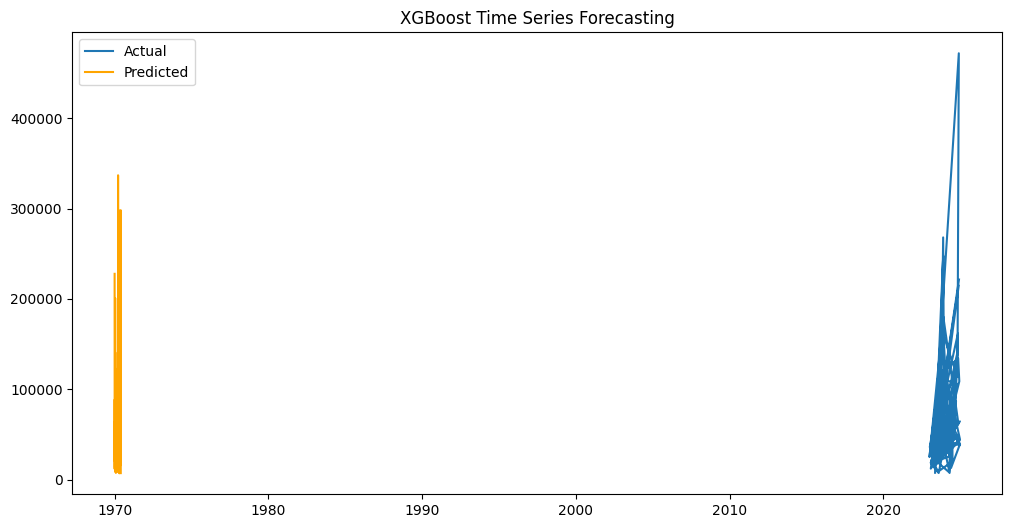

In [77]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train_scaled, y_train)
y_pred_xgb = model_xgb.predict(X_test_scaled)
print("XGBoost R-squared:", r2_score(y_test, y_pred_xgb))
print("XGBoost Mean Squared Error:", mean_squared_error(y_test, y_pred_xgb))
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_xgb, label='Predicted', color='orange')
plt.legend()
plt.title('XGBoost Time Series Forecasting')
plt.show()

In [78]:
y_pred_xgb

array([227732.78 ,  11849.121,  29092.95 ,  60076.242,  88831.66 ,
        44064.86 ,  20330.492,  56731.63 ,  64552.47 ,  13376.564,
        38705.09 ,  66965.95 ,  28608.885, 200939.28 ,  25167.016,
        43962.312,  21292.826,  38851.25 ,  18730.174,  90451.49 ,
       116024.59 ,  80073.945,   8243.658,  25208.158,  38054.14 ,
        36067.637,  31695.842,  46860.38 ,  33768.26 ,  43391.242,
        80044.33 ,  49186.477,   7546.806,  53107.293,  48610.98 ,
        59083.734,  72334.14 ,  59392.4  , 122449.77 ,  36420.133,
        13834.058, 101263.266,  74198.016,  19528.943,  55540.547,
        53729.332,  41604.707,  63891.656,  15634.992,  54192.742,
        27604.082,  90114.516, 121842.06 ,  23368.387,  21550.56 ,
        38434.805,  47141.008,  13783.075,  25486.143,  83785.74 ,
        52165.438,  59999.97 ,  30570.604,  71495.55 ,  54172.977,
        90689.836,  19683.688,   8494.627,  20170.459,  81038.38 ,
        42608.266,  28020.52 ,  95619.08 ,  13385.248, 101714.

In [79]:
temp_sales = df.copy()
print(temp_sales.isnull().sum())
temp_sales.dropna(inplace=True)
start_date = '2023-01-01'
end_date = '2024-12-31'
temp_sales = temp_sales[(temp_sales['Created at'] >= start_date) & (temp_sales['Created at'] <= end_date)]
temp_sales.set_index('Created at', inplace=True)

Name                             0
Created at                       0
Subtotal                         0
Shipping                         0
Total                            0
Discount Amount                  0
Shipping Method                  0
Shipping Province                0
Shipping Province Name           0
Payment Method                   0
Lineitem name                    0
Lineitem price                   0
Lineitem compare at price        0
Lineitem sku                     0
Lineitem sku_made                0
Lineitem quantity                0
Lineitem discount                0
Cancelled at                 21533
Refunded Amount                  0
hour                             0
month                            0
day_of_week                      0
year                             0
year_month                       0
season                           0
holiday_name                 24051
is_holiday                       0
is_weekend                       0
day_type            